## **A Tour of ML classifiers using scikit-learn**

In this chapter, we will take a tour of a selection of popular and powerful machine learning algorithms
that are commonly used in academia as well as in industry. While learning about the differences
between several supervised learning algorithms for classification, we will also develop an appreci-
ation of their individual strengths and weaknesses. In addition, we will take our first steps with the
scikit-learn library, which offers a user-friendly and consistent interface for using those algorithms
efficiently and productively.

The topics that will be covered throughout this chapter are as follows:



• An introduction to robust and popular algorithms for classification, such as logistic regression,
support vector machines, decision trees, and k-nearest neighbors

• Examples and explanations using the scikit-learn machine learning library, which provides a
wide variety of machine learning algorithms via a user-friendly Python API

• Discussions about the strengths and weaknesses of classifiers with linear and nonlinear de-
cision boundaries

In [1]:
from IPython.display import Image
%matplotlib inline

Eventually, the performance of a classifier—computational performance as well as predictive pow-
er—depends heavily on the underlying data that is available for learning. The five main steps that are
involved in training a supervised machine learning algorithm can be summarized as follows:

1. Selecting features and collecting labeled training examples
2. Choosing a performance metric
3. Choosing a learning algorithm and training a model
4. Evaluating the performance of the model
5. Changing the settings of the algorithm and tuning the model.

#### Chossing a classification algorithm
...

#### First steps with scikit-learn


Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower examples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [5]:
!pip install scikit-learn                   

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 3.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.9/301.9 kB 4.6 MB/s eta 0:00:00 MB/s eta 0:00:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [3]:
print('Class labels:',np.unique(y)) 

Class labels: [0 1 2]


Although many scikit-learn functions and class methods also work
with class labels in string format, using integer labels is a recommended approach to avoid technical
glitches and improve computational performance due to a smaller memory footprint; furthermore,
encoding class labels as integers is a common convention among most machine learning libraries.

Splitting data into 70% training and 30% test data:



In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

Note that the train_test_split function already shuffles the training datasets internally before split-
ting; otherwise, all examples from class 0 and class 1 would have ended up in the training datasets,
and the test dataset would consist of 45 examples from class 2 . Via the random_state parameter, we
provided a fixed random seed ( random_state=1 ) for the internal pseudo-random number generator
that is used for shuffling the datasets prior to splitting. Using such a fixed random_state ensures that
our results are reproducible.

Lastly, we took advantage of the built-in support for stratification via stratify=y . In this context,
stratification means that the train_test_split method returns training and test subsets that have the
same proportions of class labels as the input dataset. We can use NumPy’s bincount function, which
counts the number of occurrences of each value in an array, to verify that this is indeed the case:

In [5]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


Standardizing the features:



In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Using the preceding code, we loaded the StandardScaler class from the preprocessing module and
initialized a new StandardScaler object that we assigned to the sc variable. Using the fit method,
StandardScaler estimated the parameters, 𝜇𝜇 (sample mean) and 𝜎𝜎 (standard deviation), for each
feature dimension from the training data. By calling the transform method, we then standardized
the training data using those estimated parameters, 𝜇𝜇 and 𝜎𝜎 . Note that we used the same scaling
parameters to standardize the test dataset so that both the values in the training and test dataset are
comparable with one another.

**Training a perceptron via scikit-learn**

In [7]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [8]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [9]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [10]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))


Accuracy: 0.978


Finally, we can use our plot_decision_regions function from Chapter 2 to plot the decision regions
of our newly trained perceptron model and visualize how well it separates the different flower exam-
ples. However, let’s add a small modification to highlight the data instances from the test dataset via
small circles:

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        

Training a perceptron model using the standardized training data:



With the slight modification that we made to the plot_decision_regions function, we can now specify
the indices of the examples that we want to mark on the resulting plots. The code is as follows:

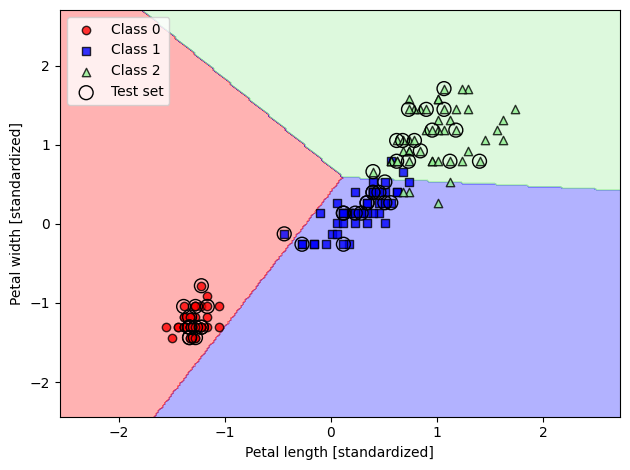

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()

However, remember from our discussion in Chapter 2 that the perceptron algorithm never converges
on datasets that aren’t perfectly linearly separable, which is why the use of the perceptron algorithm is
typically not recommended in practice. In the following sections, we will look at more powerful linear
classifiers that converge to a loss minimum even if the classes are not perfectly linearly separable.

#### Modeling class probabilities via logistic regression



Although the perceptron rule offers a nice and easy-going introduction to machine learning algorithms
for classification, its biggest disadvantage is that it never converges if the classes are not perfectly lin-
early separable. The classification task in the previous section would be an example of such a scenario.
The reason for this is that the weights are continuously being updated since there is always at least one
misclassified training example present in each epoch. Of course, you can change the learning rate and
increase the number of epochs, but be warned that the perceptron will never converge on this dataset.
To make better use of our time, we will now take a look at another simple, yet more powerful, algo-
rithm for linear and binary classification problems: logistic regression. Note that, despite its name,
logistic regression is a model for classification, not regression.



##### Logistic regression intuition and conditional probabilities

Logistic regression is a classification model that is very easy to implement and performs very well on
linearly separable classes. It is one of the most widely used algorithms for classification in industry.
Similar to the perceptron and Adaline, the logistic regression model in this chapter is also a linear
model for binary classification.

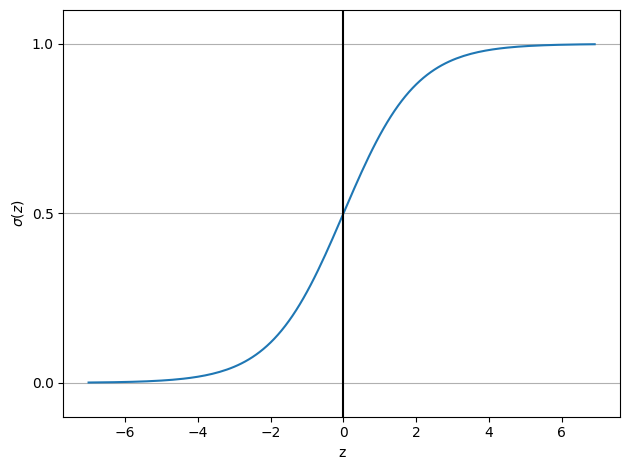

In [13]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('figures/03_02.png', dpi=300)
plt.show()


We can see that 𝜎(𝑧) approaches 1 if z goes toward infinity (z→∞) since e –z becomes very small for large
values of z. Similarly, 𝜎(𝑧) goes toward 0 for z→–∞ as a result of an increasingly large denominator.
Thus, we can conclude that this sigmoid function takes real-number values as input and transforms
them into values in the range [0, 1] with an intercept at 𝜎𝜎(0) = 0.5 .


To build some understanding of the logistic regression model, we can relate it to Chapter 2. In Adaline,
we used the identity function, 𝜎(𝑧) = 𝑧 , as the activation function. In logistic regression, this activation
function simply becomes the sigmoid function that we defined earlier.



The difference between Adaline and logistic regression is illustrated in the following figure, where
the only difference is the activation function:

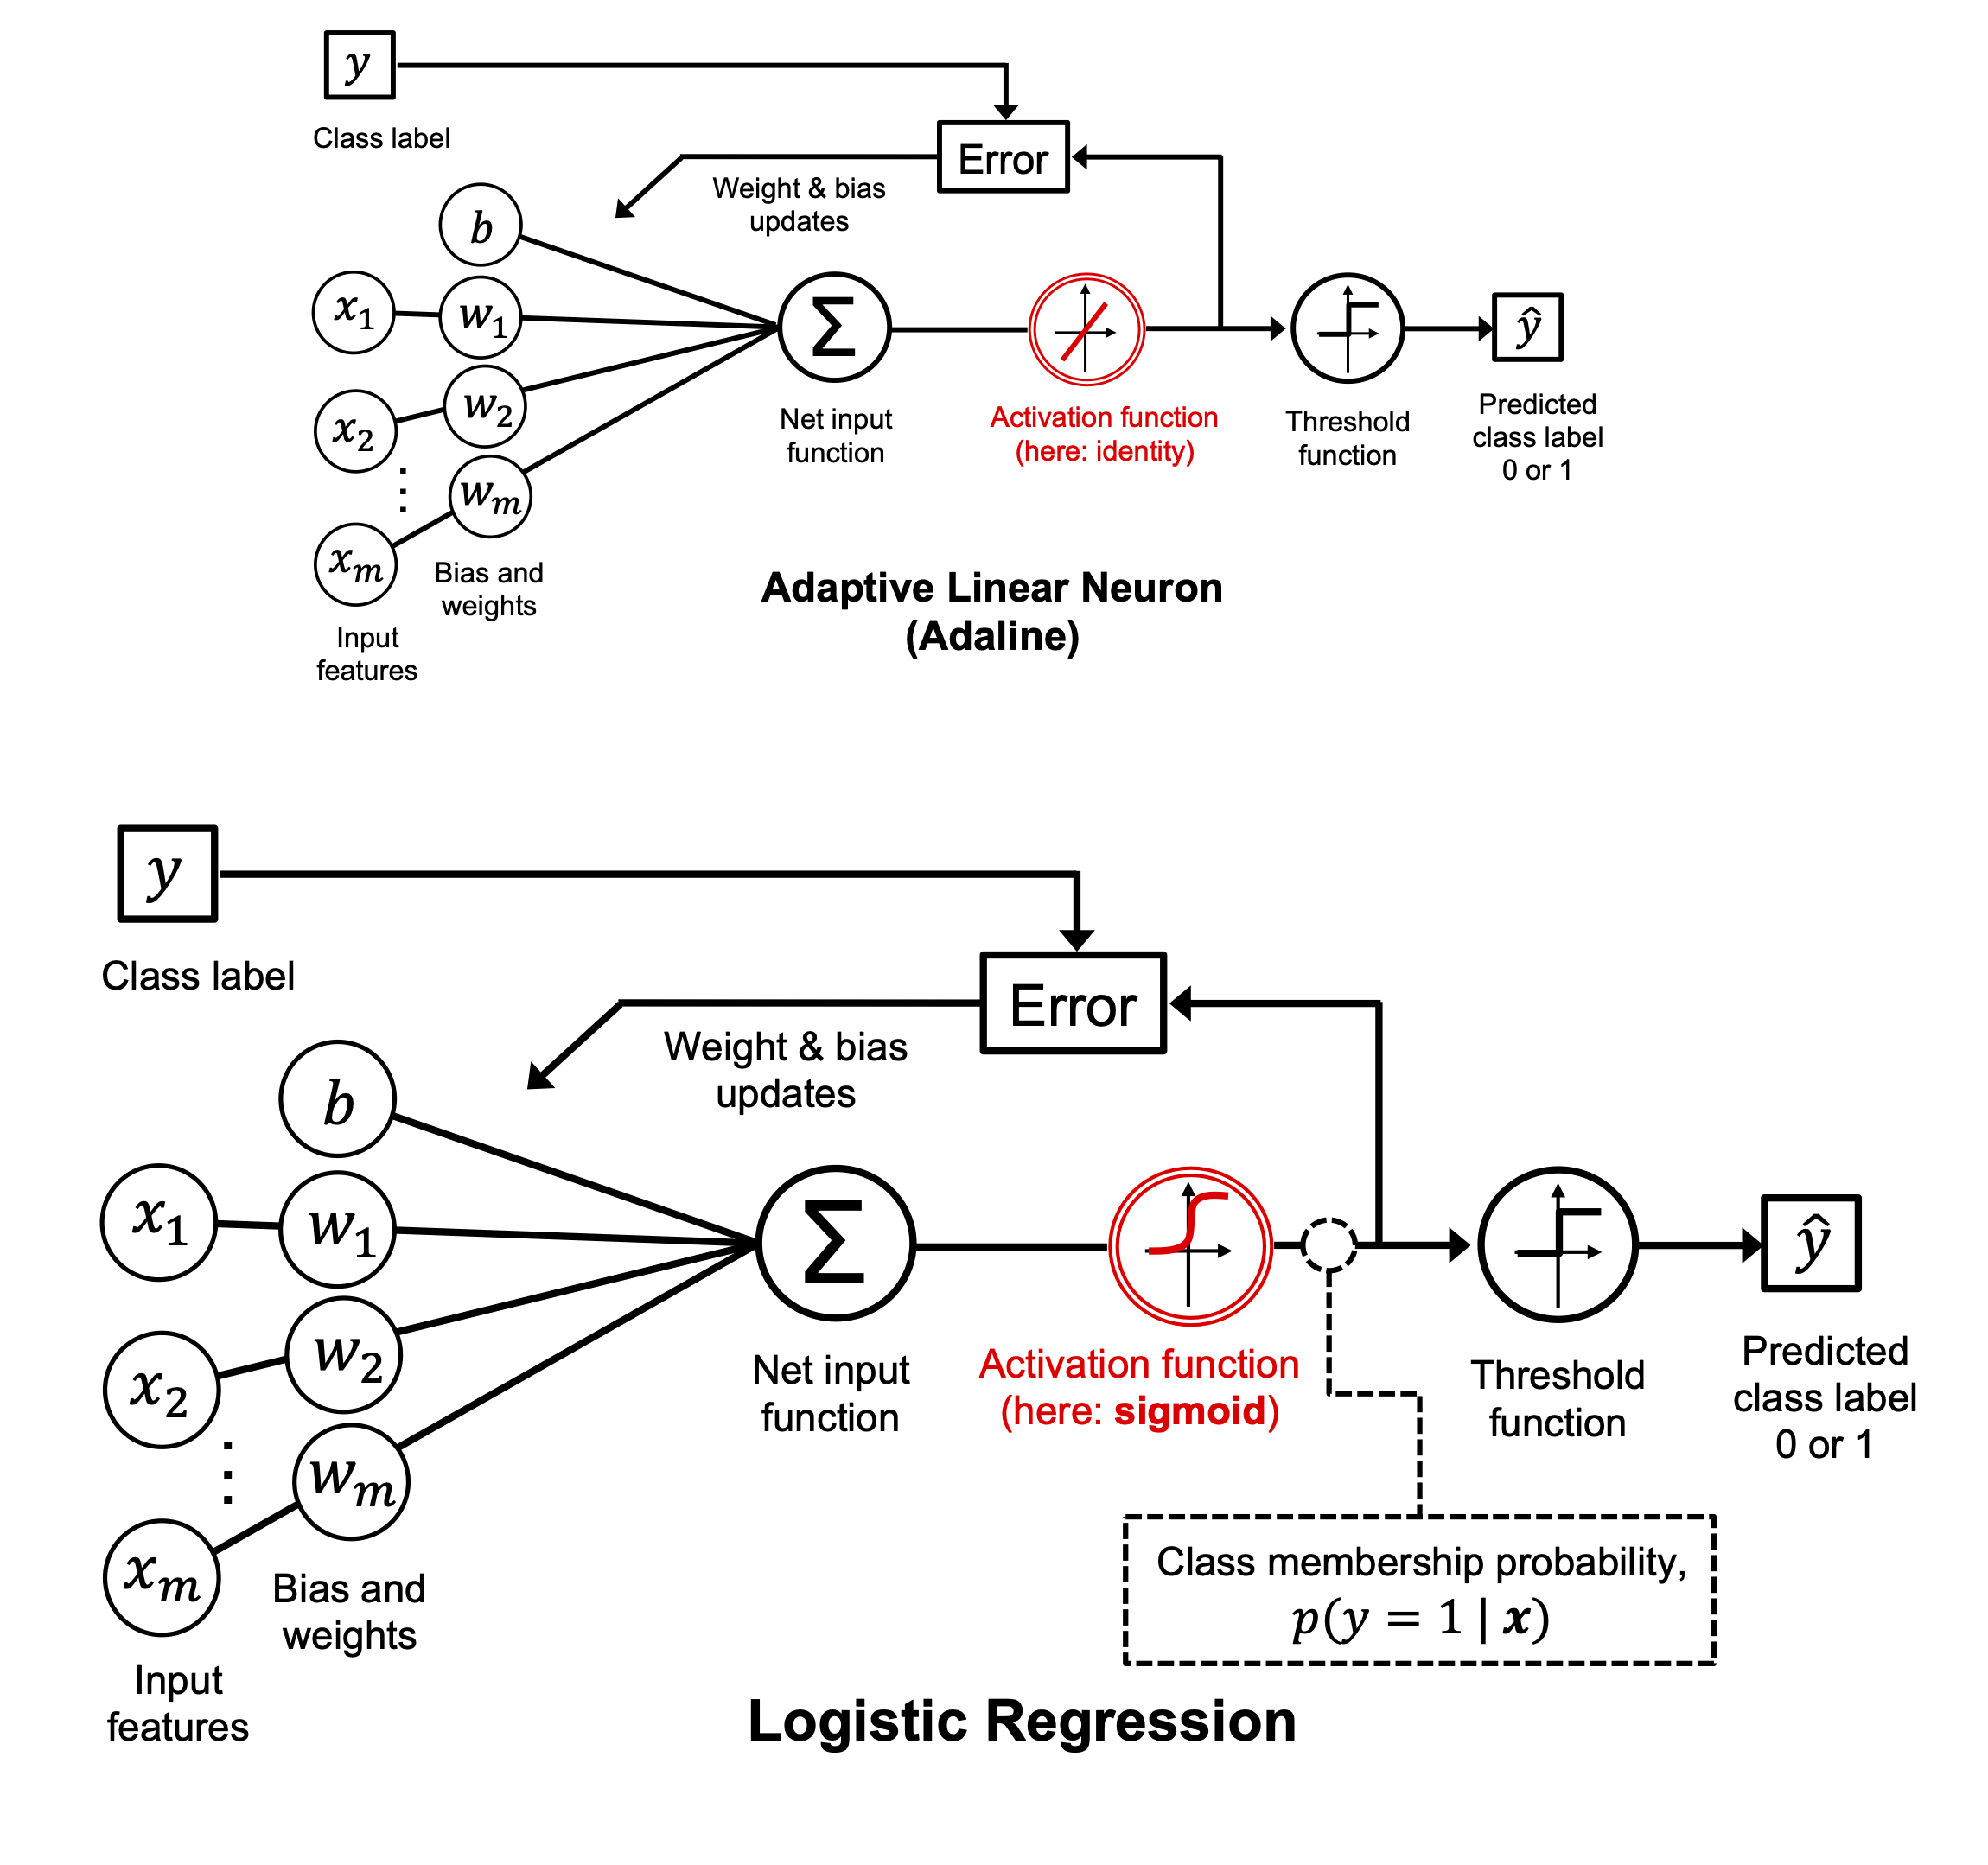

In [14]:
from IPython.display import Image
Image(filename='figures/03_03.png', width=800) 


The output of the sigmoid function is then interpreted as the probability of a particular ex-
ample belonging to class 1, 𝜎𝜎(𝑧𝑧) = 𝑝𝑝(𝑦𝑦 𝑦 𝑦|𝒙𝒙𝒙 𝒙𝒙𝒙 𝒙𝒙) , given its features, x, and parameterized by the weights and bias, w and b. For example, if we compute 𝜎𝜎(𝑧𝑧) = 0.8 for a particular flow-
er example, it means that the chance that this example is an Iris-versicolor flower is 80 per-
cent. Therefore, the probability that this flower is an Iris-setosa flower can be calculated as
p(y = 0|x; w, b) = 1 – p(y = 1|x; w, b) = 0.2, or 20 percent.


The predicted probability can then simply be converted into a binary outcome via a threshold function:

                                        𝑦^ = { 1    if 𝜎(𝑧) ≥ 0.5    
                                               0    otherwise

If we look at the preceding plot of the sigmoid function, this is equivalent to the following:
                                        y^ = { 1 if z ≥ 0.0
                                               0    otherwise


In fact, there are many applications where we are not only interested in the predicted class labels,
but where the estimation of the class-membership probability is particularly useful (the output of
the sigmoid function prior to applying the threshold function). Logistic regression is used in weather
forecasting, for example, not only to predict whether it will rain on a particular day, but also to report
the chance of rain. Similarly, logistic regression can be used to predict the chance that a patient has
a particular disease given certain symptoms, which is why logistic regression enjoys great popularity
in the field of medicine.

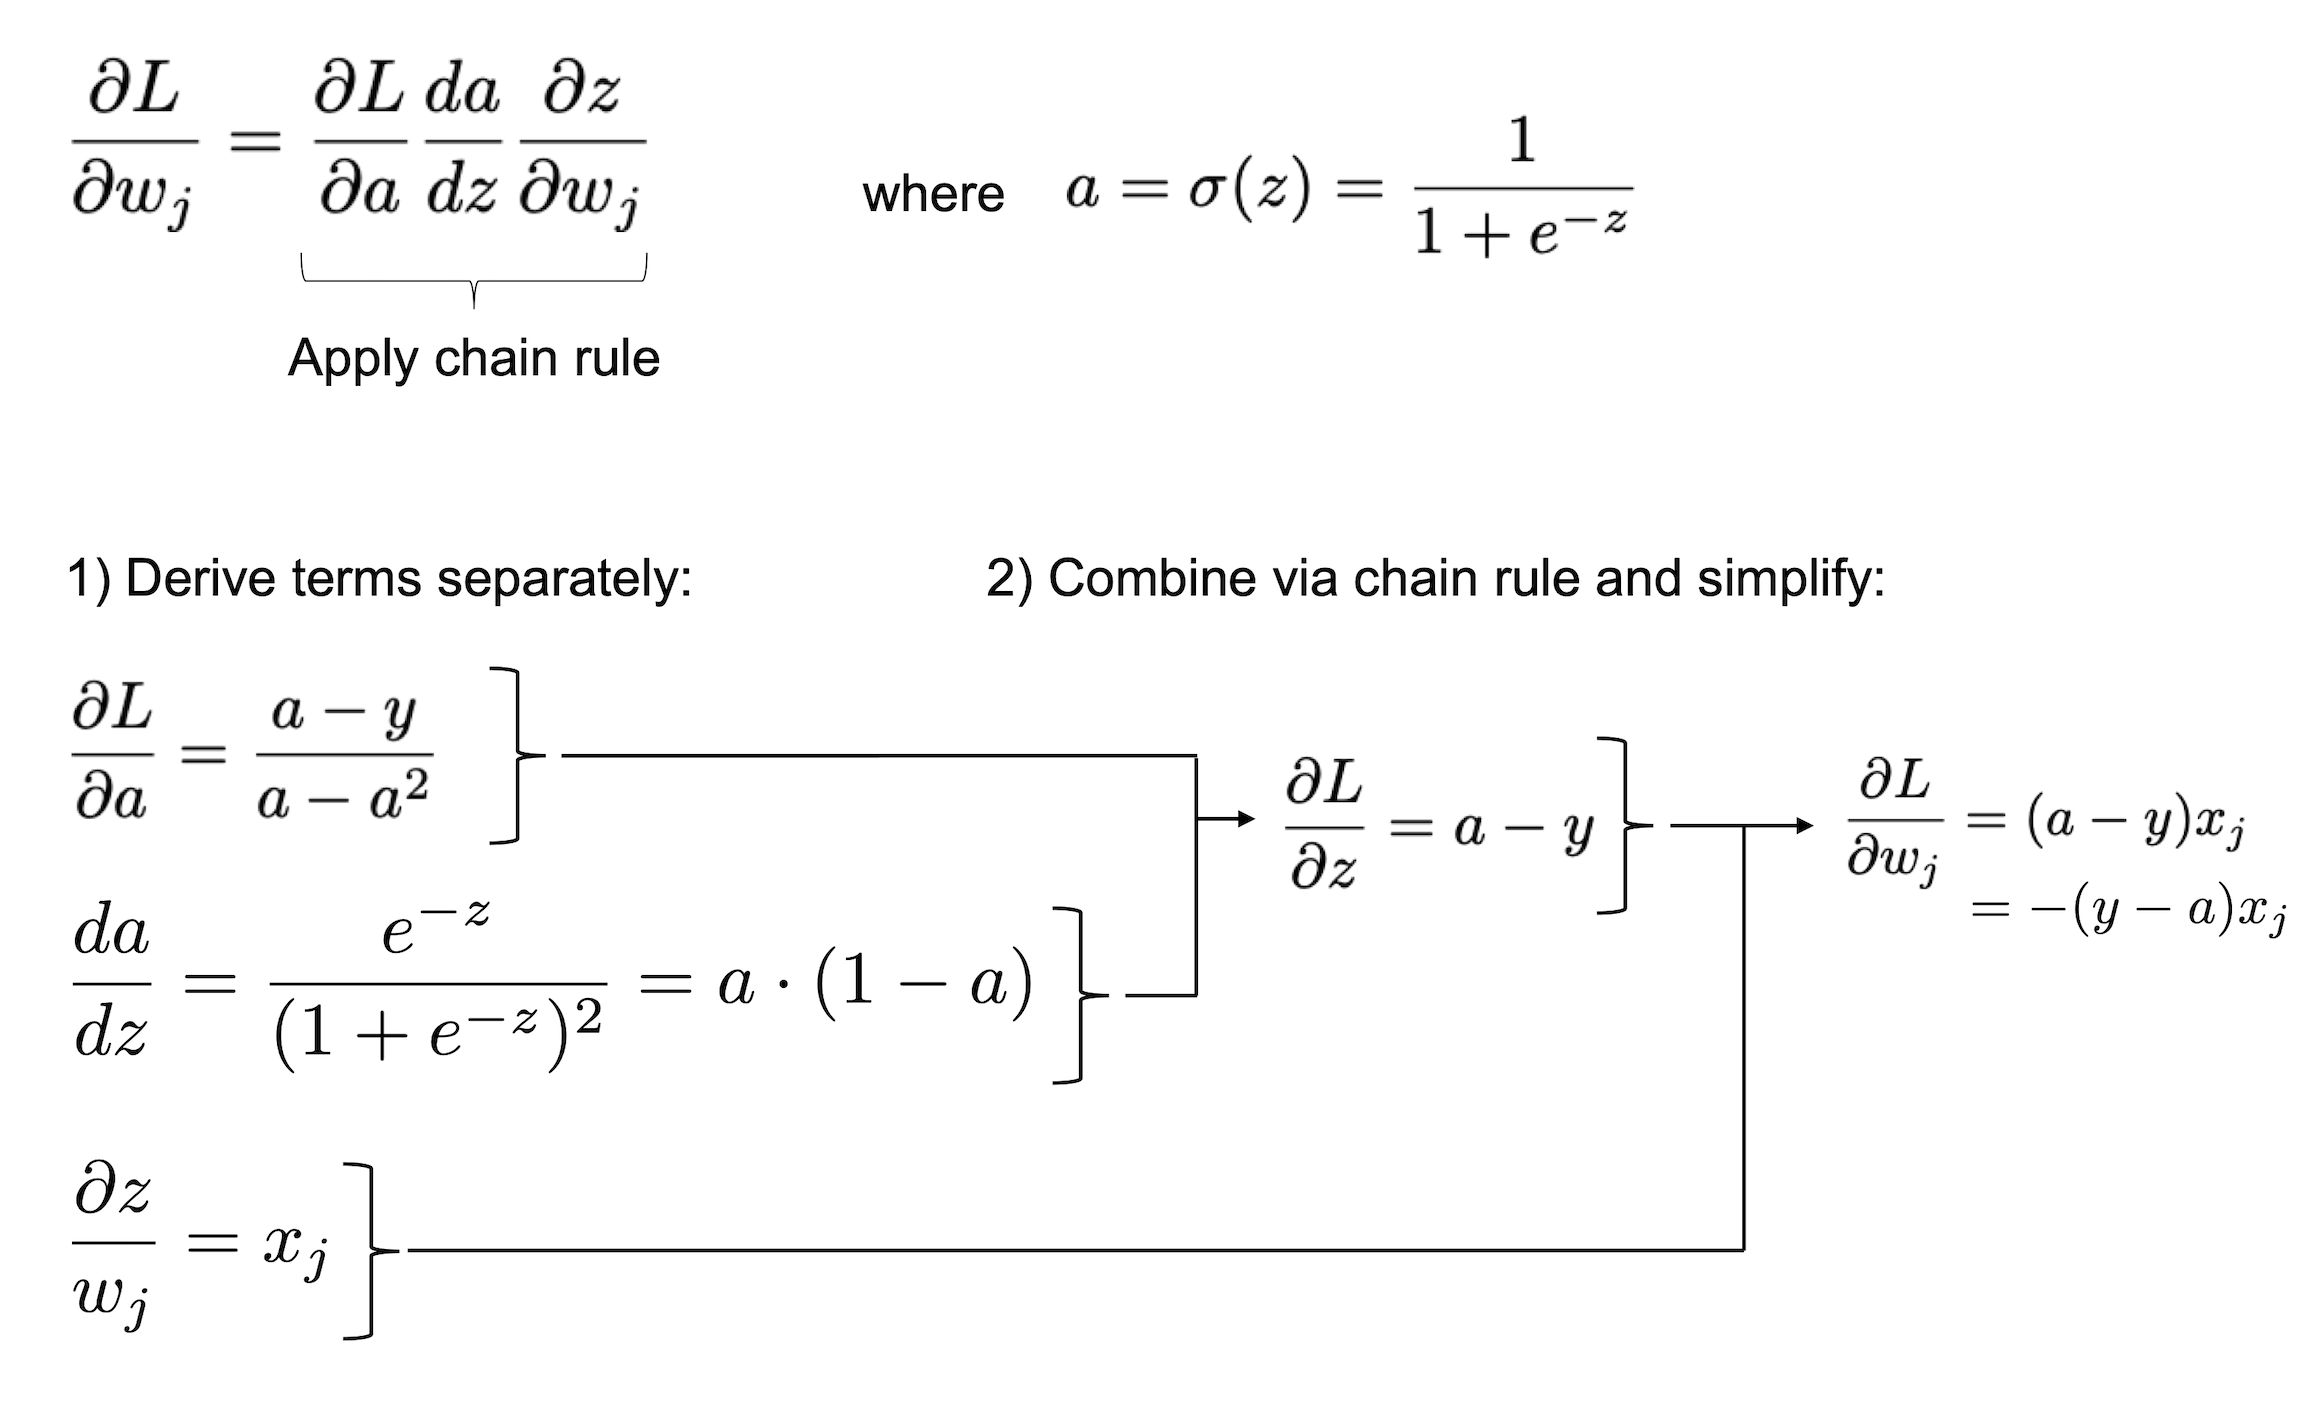

In [15]:
Image(filename='figures/03_25.png', width=800) 


Learning the weights of the logistic loss function


The resulting plot shows the sigmoid activation on the x axis in the range 0 to 1 (the inputs to the
sigmoid function were z values in the range –10 to 10) and the associated logistic loss on the y axis:

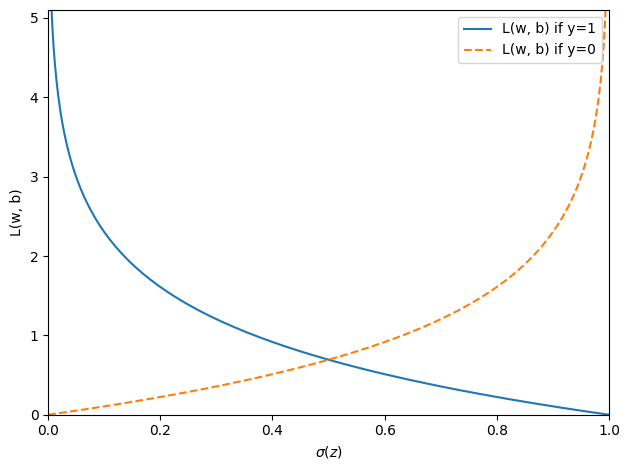

In [16]:
def loss_1(z):
    return - np.log(sigmoid(z))

def loss_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)

c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')

c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/03_04.png', dpi=300)
plt.show()

#### **Converting an Adaline Implementation into an algorithm for logistic regression**

If we were to implement logistic regression ourselves, we could simply substitute the loss function, L,
in our Adaline implementation from Chapter 2, with the new loss function:

                                    

We use this to compute the loss of classifying all training examples per epoch. Also, we need to swap
the linear activation function with the sigmoid. If we make those changes to the Adaline code, we will
end up with a working logistic regression implementation. The following is an implementation for
full-batch gradient descent (but note that the same changes could be made to the stochastic gradient
descent version as well):

In [17]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
       Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


When we fit a logistic regression model, we have to keep in mind that it only works for binary clas-
sification tasks.

So, let’s consider only setosa and versicolor flowers (classes 0 and 1 ) and check that our implemen-
tation of logistic regression works:

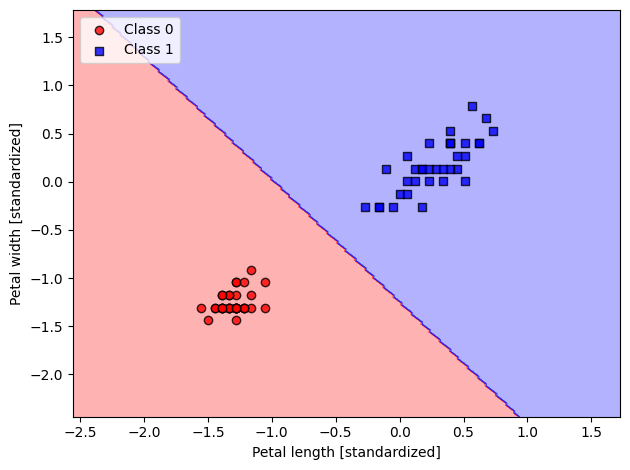

In [18]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_05.png', dpi=300)
plt.show()

Training a logistic regression model with scikit-learn


We just went through useful coding and math exercises in the previous subsection, which helped to
illustrate the conceptual differences between Adaline and logistic regression. Now, let’s learn how to
use scikit-learn’s more optimized implementation of logistic regression, which also supports multiclass
settings off the shelf. Note that in recent versions of scikit-learn, the technique used for multiclass
classification, multinomial, or OvR, is chosen automatically. In the following code example, we will use
the sklearn.linear_model.LogisticRegression class as well as the familiar fit method to train the
model on all three classes in the standardized flower training dataset. Also, we set multi_class='ovr'
for illustration purposes. As an exercise for the reader, you may want to compare the results with
multi_class='multinomial' . Note that the multinomial setting is now the default choice in scikit-
learn’s LogisticRegression class and recommended in practice for mutually exclusive classes, such
as those found in the Iris dataset. Here, “mutually exclusive” means that each training example can
only belong to a single class (in contrast to multilabel classification, where a training example can be
a member of multiple classes).

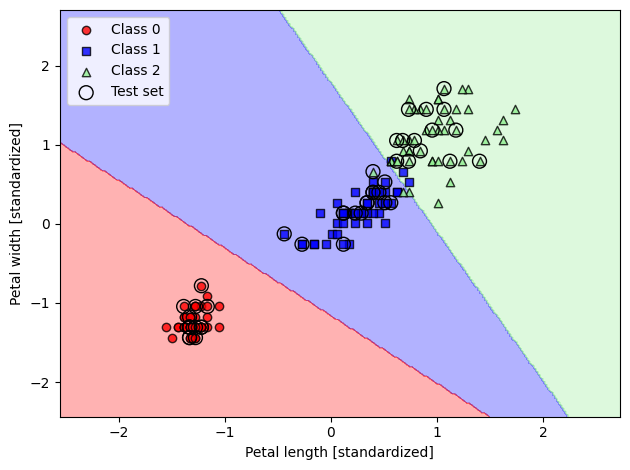

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_06.png', dpi=300)
plt.show()

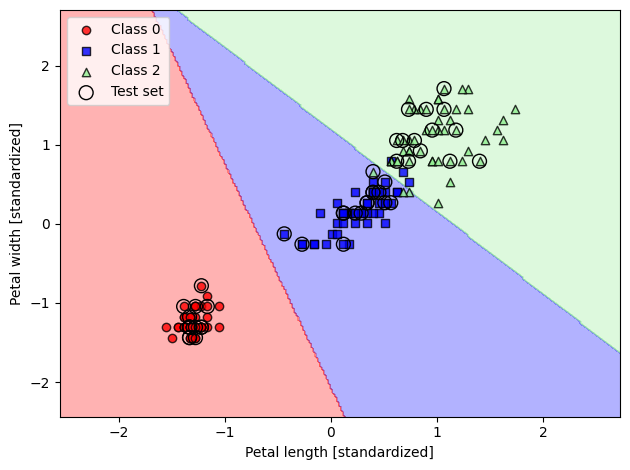

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_06.png', dpi=300)
plt.show()

The probability that training examples belong to a certain class can be computed using the predict_
proba method. For example, we can predict the probabilities of the first three examples in the test
dataset as follows:

In [20]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [21]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)


array([1., 1., 1.])

In [22]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)


array([2, 0, 0])

In the preceding code example, we computed the conditional probabilities and converted these into
class labels manually by using NumPy’s argmax function. In practice, the more convenient way of
obtaining class labels when using scikit-learn is to call the predict method directly:

In [23]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

Lastly, a word of caution if you want to predict the class label of a single flower example: scikit-learn
expects a two-dimensional array as data input; thus, we have to convert a single row slice into such a
format first. One way to convert a single row entry into a two-dimensional data array is to use NumPy’s
reshape method to add a new dimension, as demonstrated here:

In [24]:
lr.predict(X_test_std[0, :].reshape(1, -1))


array([2])

#### **Tackling overfitting via regularization**

Overfitting is a common problem in machine learning, where a model performs well on training data
but does not generalize well to unseen data (test data). If a model suffers from overfitting, we also
say that the model has a high variance, which can be caused by having too many parameters, leading
to a model that is too complex given the underlying data. Similarly, our model can also suffer from
underfitting (high bias), which means that our model is not complex enough to capture the pattern
in the training data well and therefore also suffers from low performance on unseen data.


Although we have only encountered linear models for classification so far, the problems of overfitting
and underfitting can be best illustrated by comparing a linear decision boundary to more complex,
nonlinear decision boundaries, as shown in Figure 3.8:

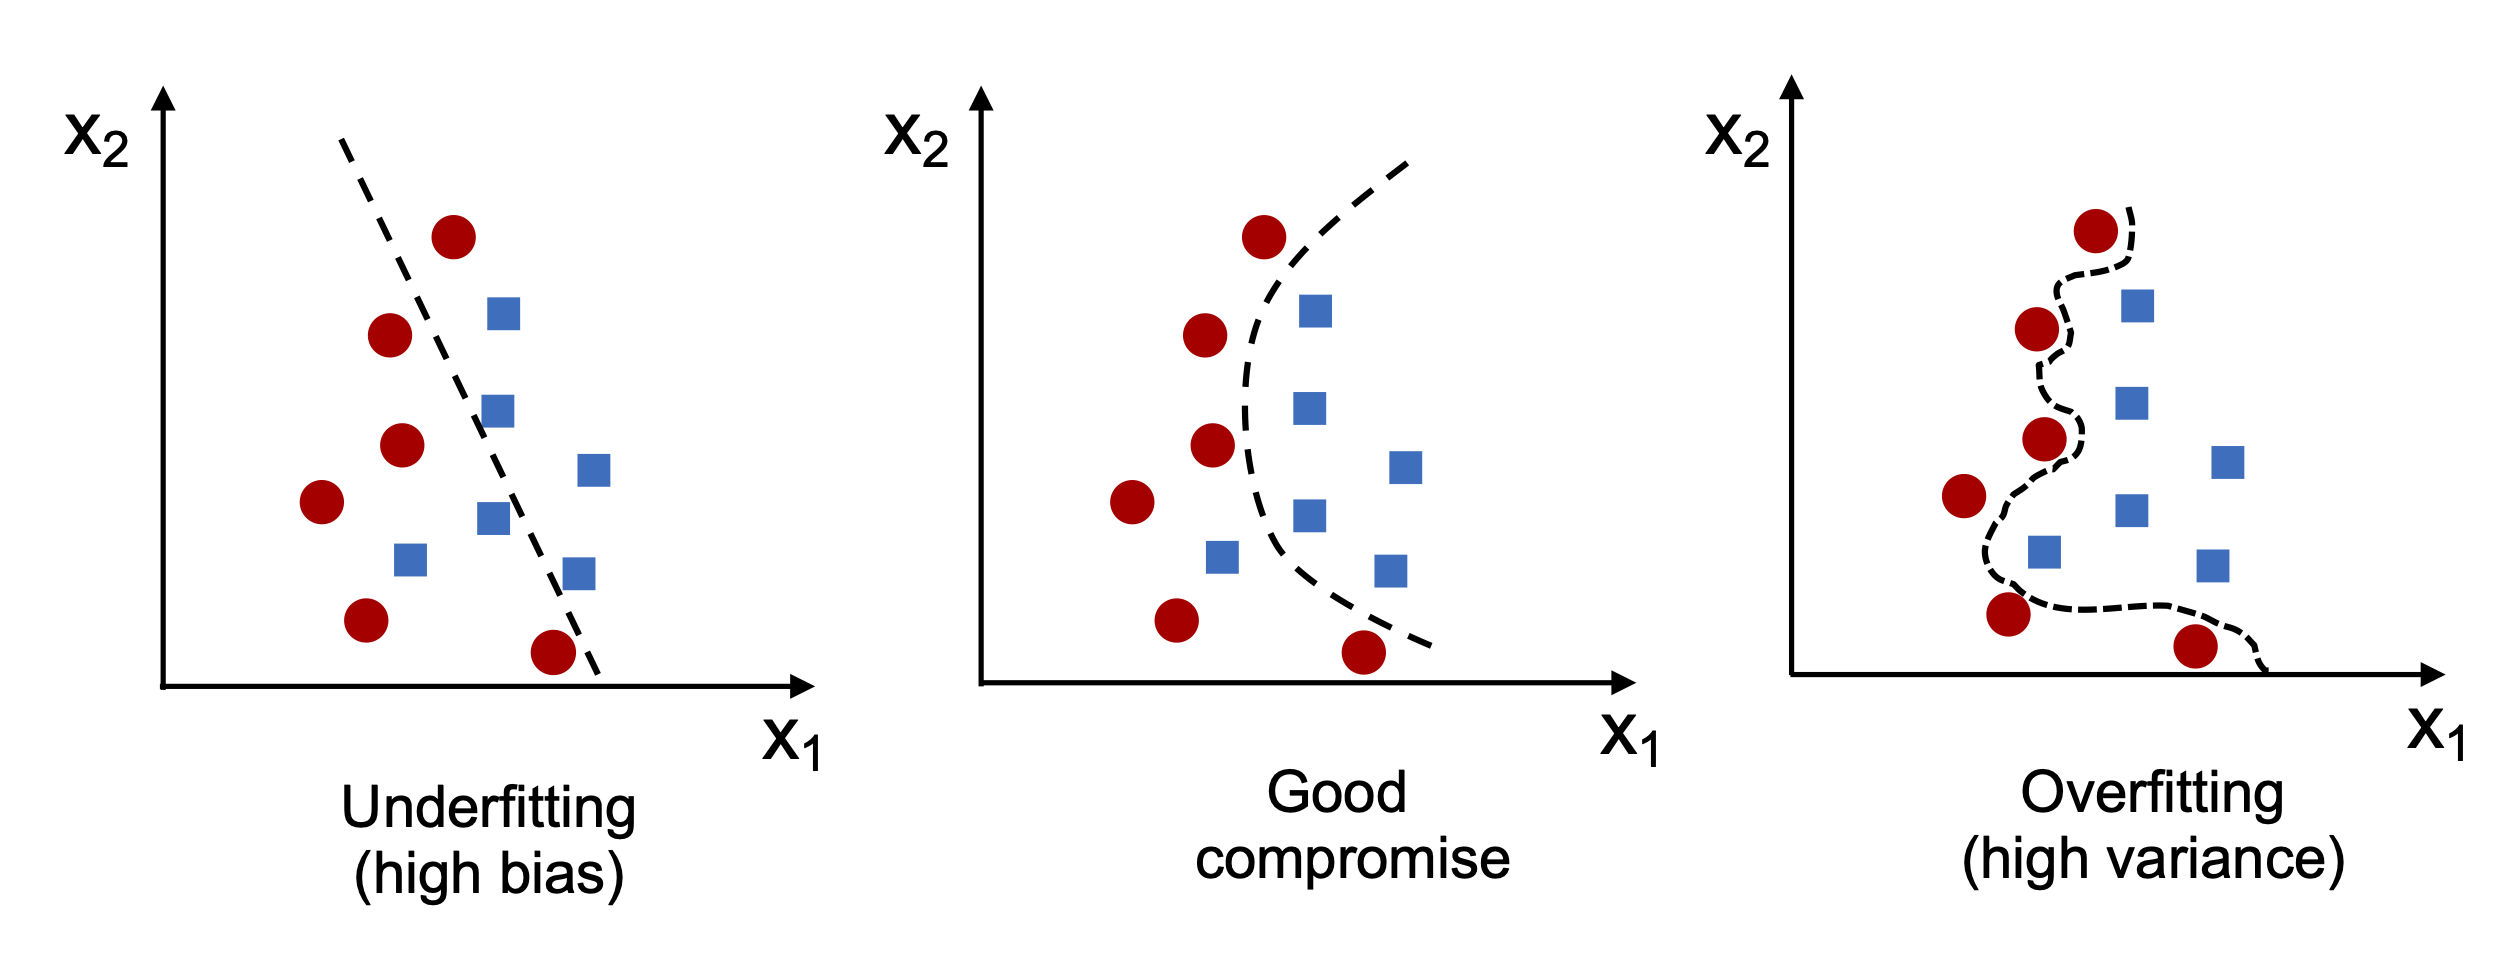

In [25]:
Image(filename='figures/03_07.png', width=700) 


The bias-variance tradeoff


Often, researchers use the terms “bias” and “variance” or “bias-variance tradeoff” to de-
scribe the performance of a model—that is, you may stumble upon talks, books, or articles
where people say that a model has a “high variance” or “high bias.” So, what does that
mean? In general, we might say that “high variance” is proportional to overfitting and
“high bias” is proportional to underfitting.

In the context of machine learning models, variance measures the consistency (or vari-
ability) of the model prediction for classifying a particular example if we retrain the model
multiple times, for example, on different subsets of the training dataset. We can say that
the model is sensitive to the randomness in the training data. In contrast, bias measures
how far off the predictions are from the correct values in general if we rebuild the model
multiple times on different training datasets; bias is the measure of the systematic error
that is not due to randomness.

One way of finding a good bias-variance tradeoff is to tune the complexity of the model via regulariza-
tion. Regularization is a very useful method for handling collinearity (high correlation among features),
filtering out noise from data, and eventually preventing overfitting.
The concept behind regularization is to introduce additional information to penalize extreme parameter
(weight) values. The most common form of regularization is so-called L2 regularization (sometimes
also called L2 shrinkage or weight decay), which can be written as follows: 

Via the regularization parameter, 𝜆 , we can then control how closely we fit the training data, while
keeping the weights small. By increasing the value of 𝜆 , we increase the regularization strength. Please
note that the bias unit, which is essentially an intercept term or negative threshold, as we learned in
Chapter 2, is usually not regularized.


The parameter, C , that is implemented for the LogisticRegression class in scikit-learn comes from
a convention in support vector machines, which will be the topic of the next section. The term C is
inversely proportional to the regularization parameter, 𝜆 . Consequently, decreasing the value of the
inverse regularization parameter, C , means that we are increasing the regularization strength, which
we can visualize by plotting the L2 regularization path for the two weight coefficients:

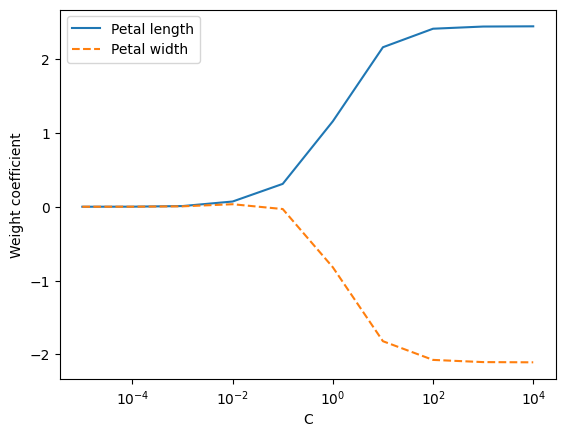

In [26]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c,
                            multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('figures/03_08.png', dpi=300)
plt.show()

By executing the preceding code, we fitted 10 logistic regression models with different values for the
inverse-regularization parameter, C . For illustration purposes, we only collected the weight coefficients
of class 1 (here, the second class in the dataset: Iris-versicolor ) versus all classifiers—remember
that we are using the OvR technique for multiclass classification.



Increasing the regularization strength can reduce overfitting, so we might ask why we don’t strongly
regularize all models by default. The reason is that we have to be careful when adjusting the regular-
ization strength. For instance, if the regularization strength is too high and the weights coefficients
approach zero, the model can perform very poorly due to underfitting, as illustrated in Figure 3.8.

#### Maximum margin classification with support vector machines


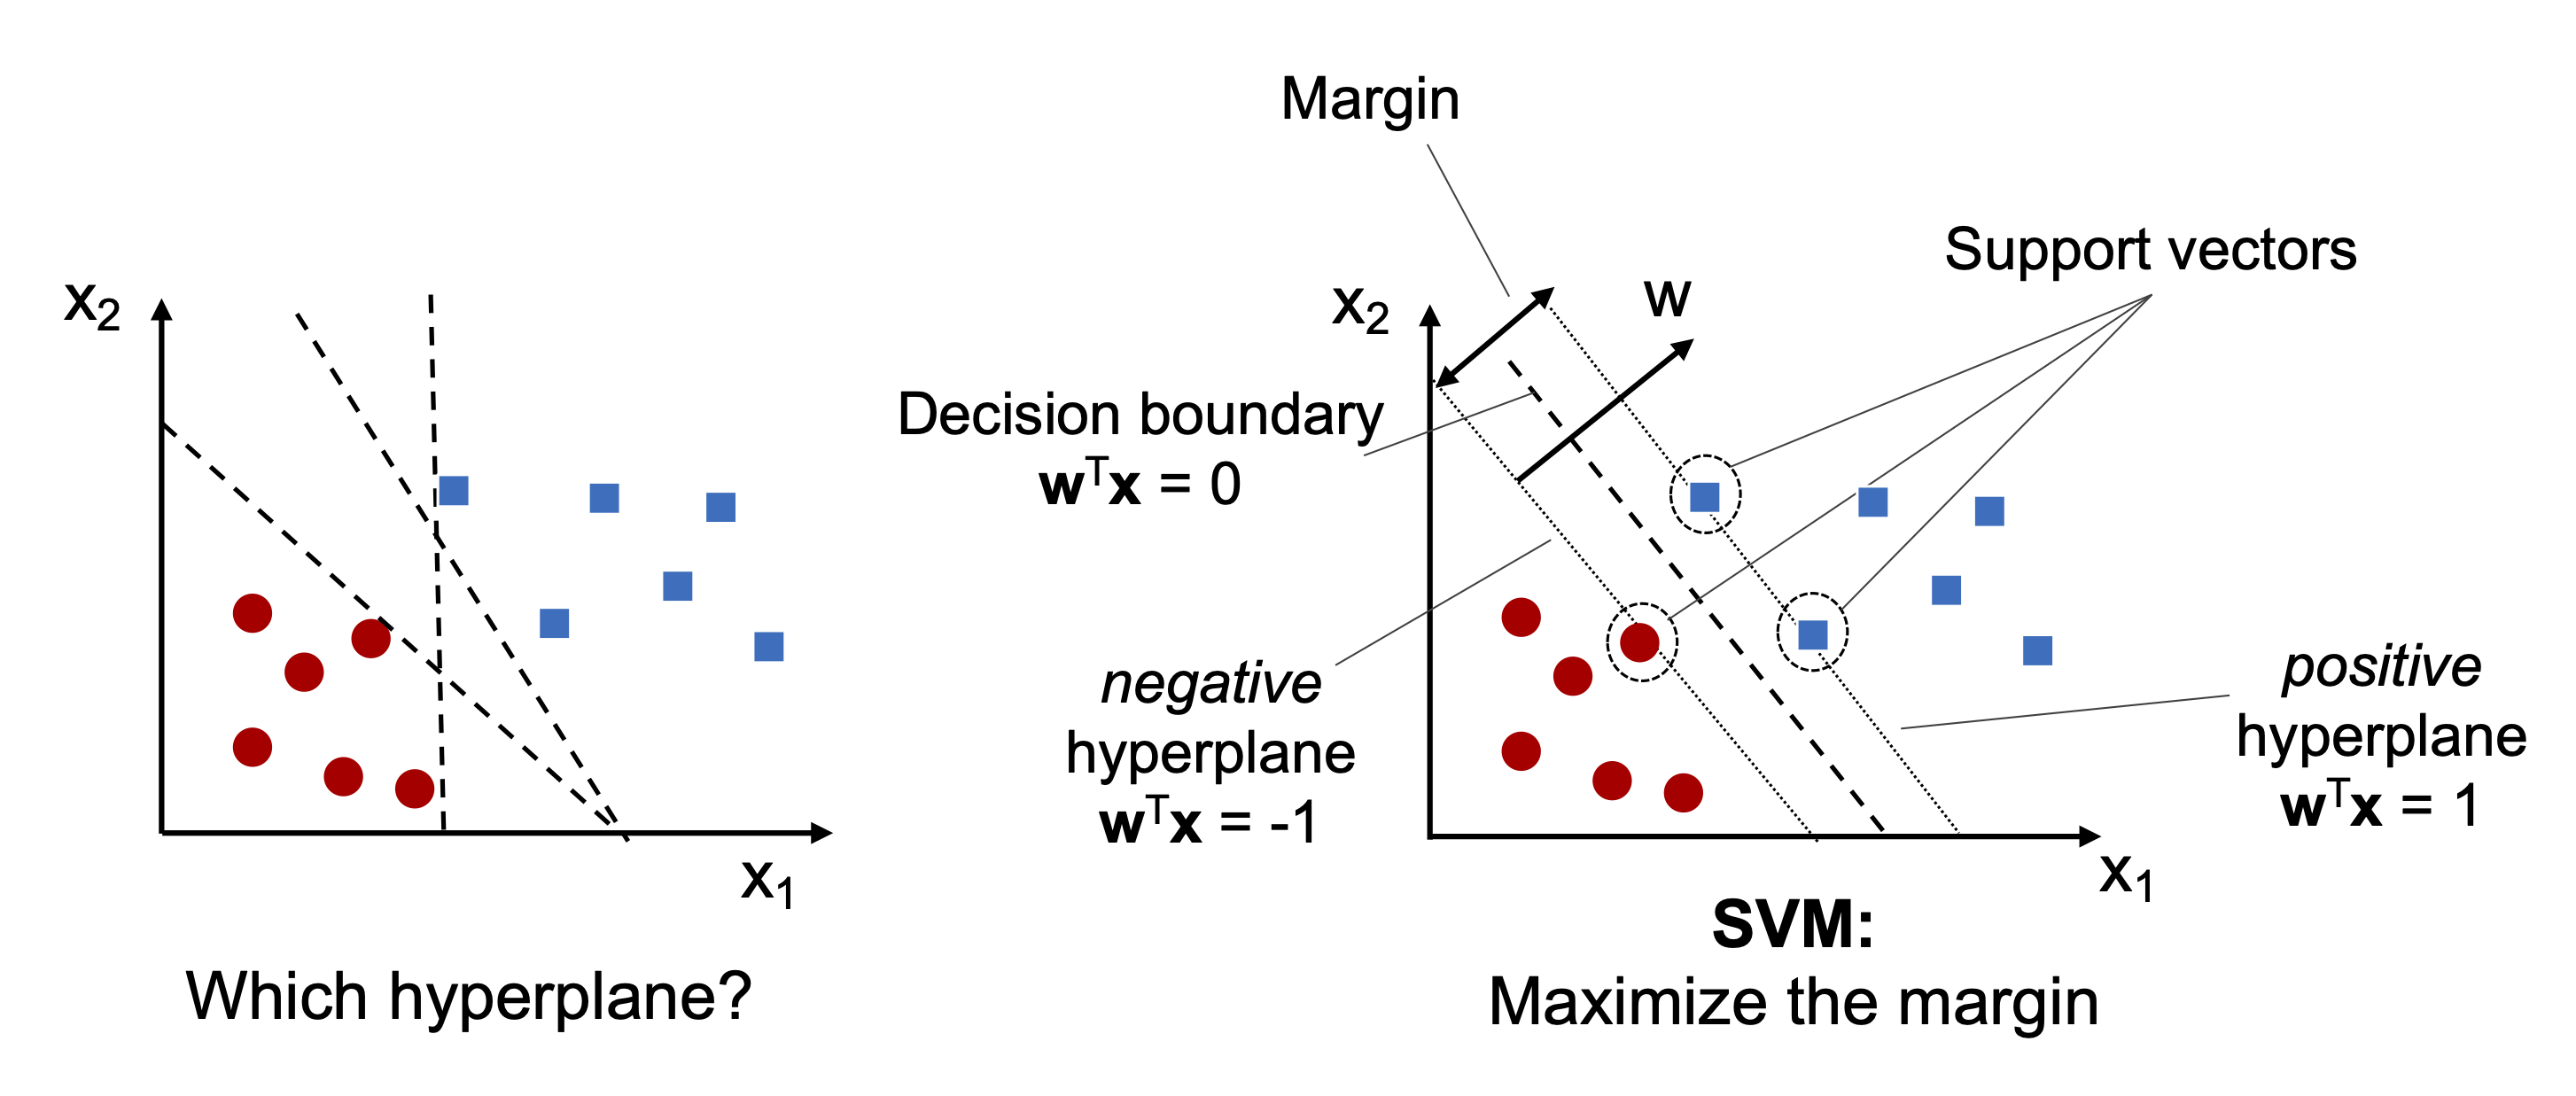

In [27]:
Image(filename='figures/03_09.png', width=700) 


#### MAximum margium intution
...
#### Dealing with non linear separable case using slack variables

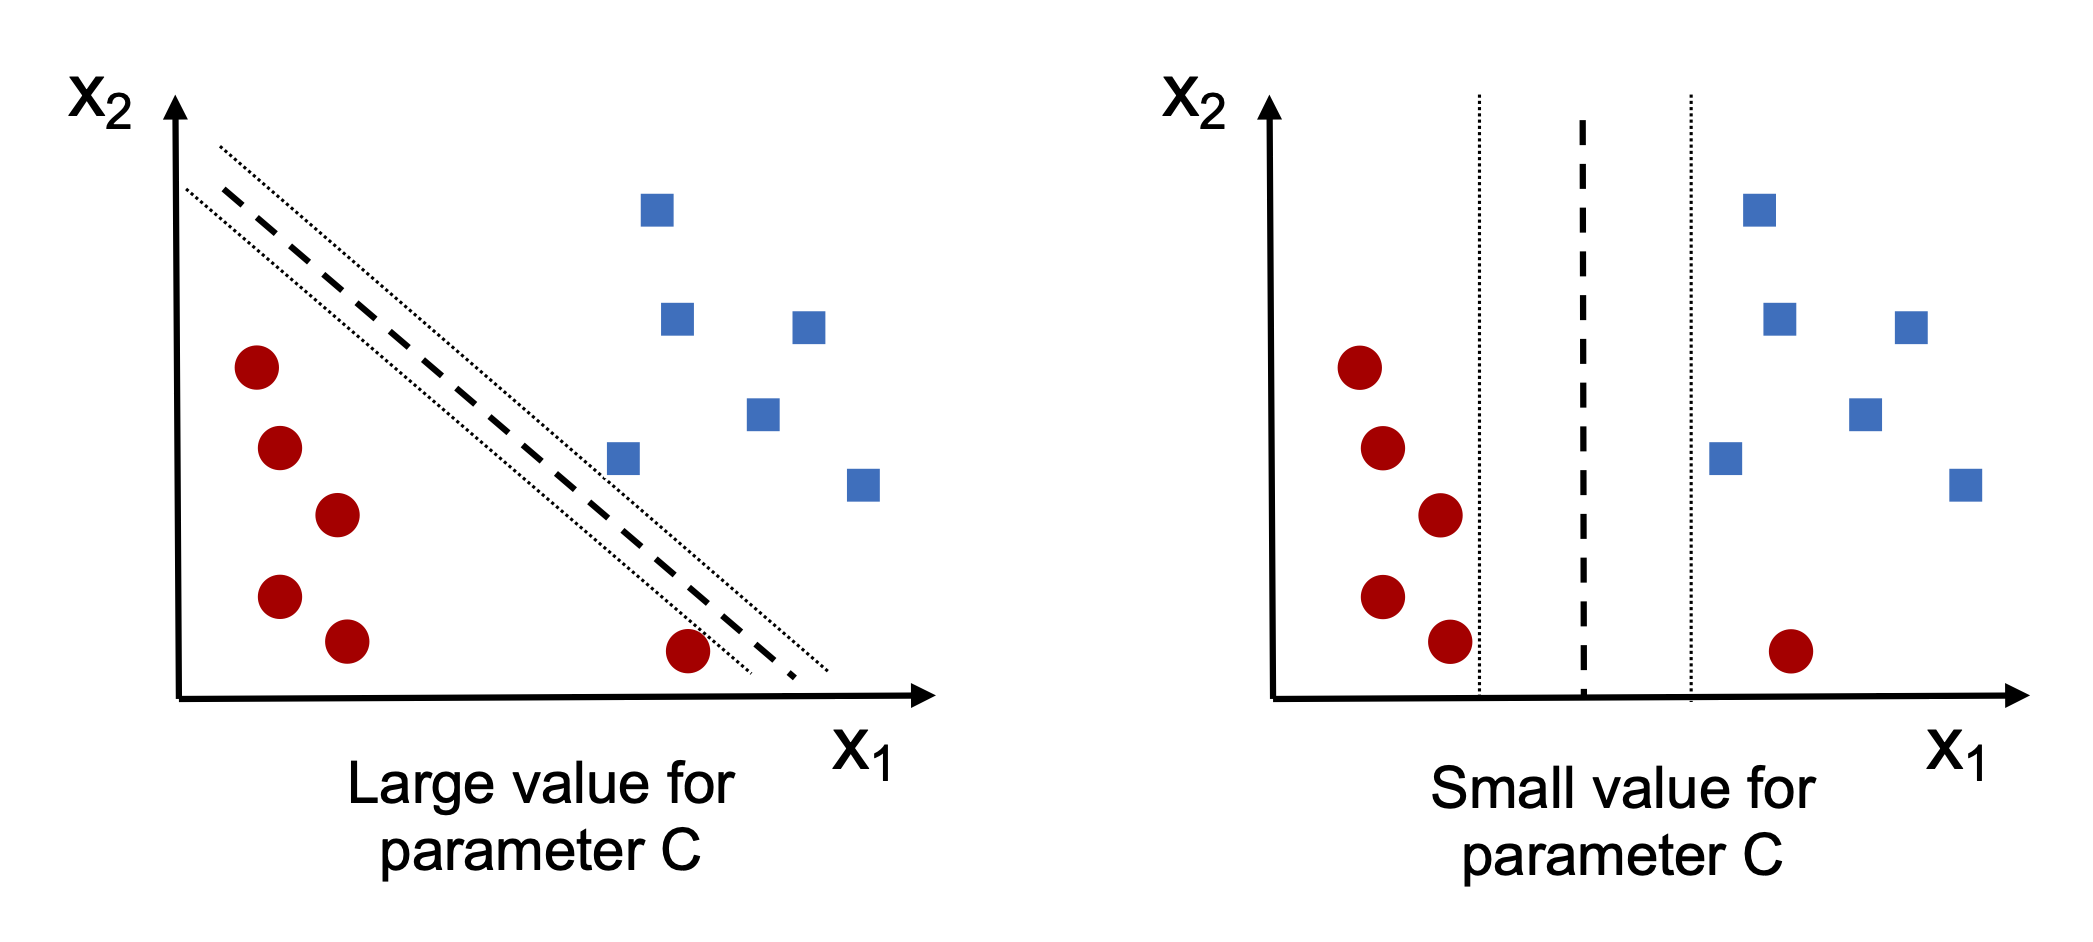

In [28]:
Image(filename='figures/03_10.png', width=600) 

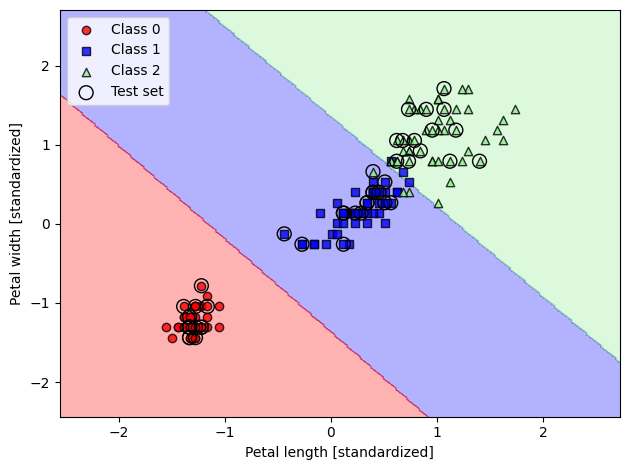

In [29]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_11.png', dpi=300)
plt.show()

Alternative implementations in scikit-learn


In [30]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

#### Solving non-linear problems using a kernel SVM


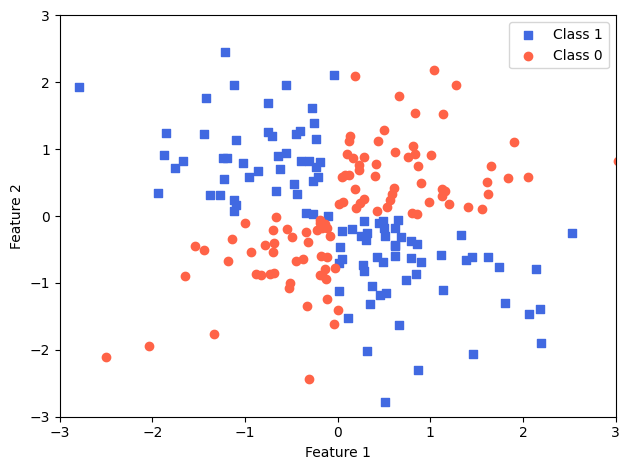

In [31]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue',
            marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato',
            marker='o',
            label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/03_12.png', dpi=300)
plt.show()

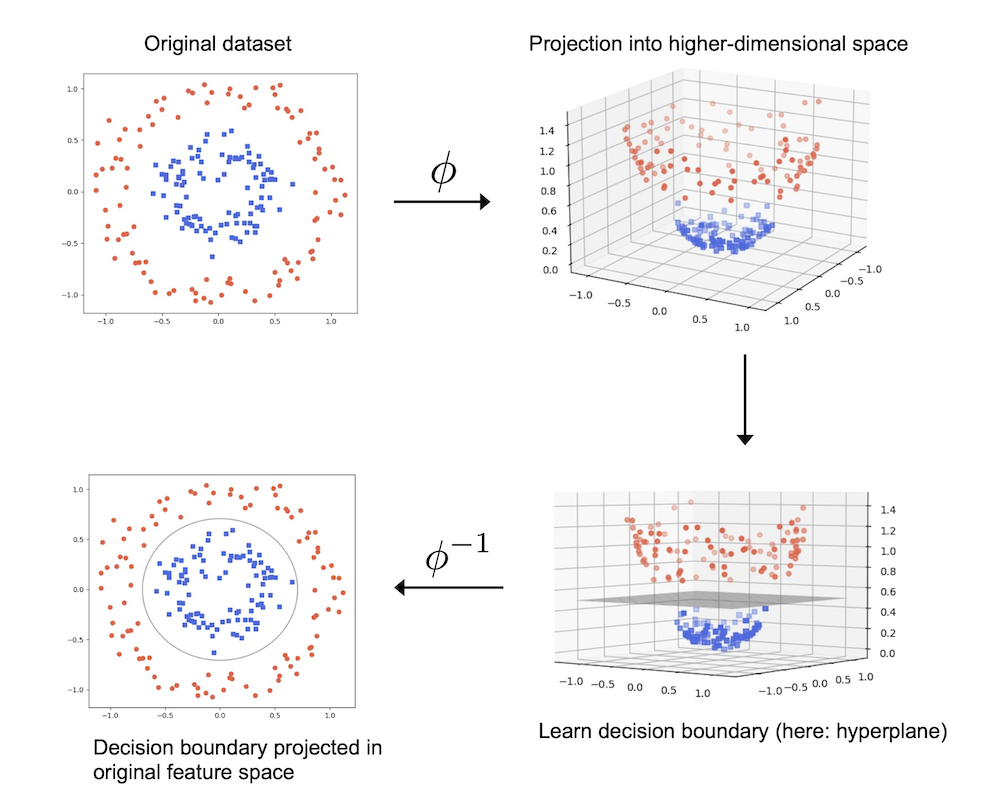

In [32]:
Image(filename='figures/03_13.png', width=700) 


#### Using the kernel trick to find separating hyperplanes in higher dimensional space


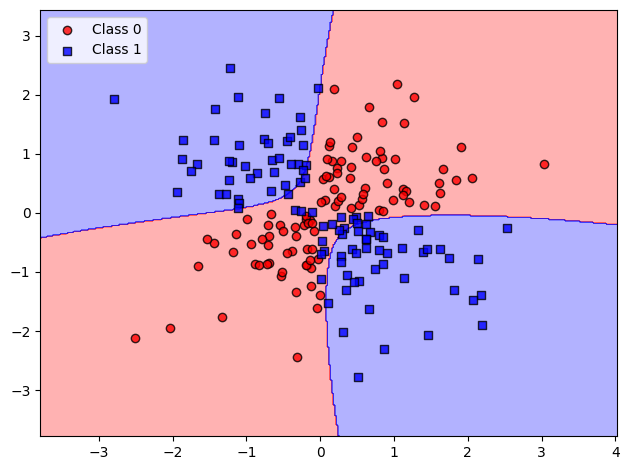

In [33]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_14.png', dpi=300)
plt.show()

The 𝛾𝛾 parameter, which we set to gamma=0.1 , can be understood as a cut-off parameter for the Gauss-
ian sphere. If we increase the value for 𝛾𝛾 , we increase the influence or reach of the training examples,
which leads to a tighter and bumpier decision boundary. To get a better understanding of 𝛾𝛾 , let’s apply
an RBF kernel SVM to our Iris flower dataset:

Since we chose a relatively small value for 𝛾 , the resulting decision boundary of the RBF kernel SVM
model will be relatively soft, as shown in the below figure.

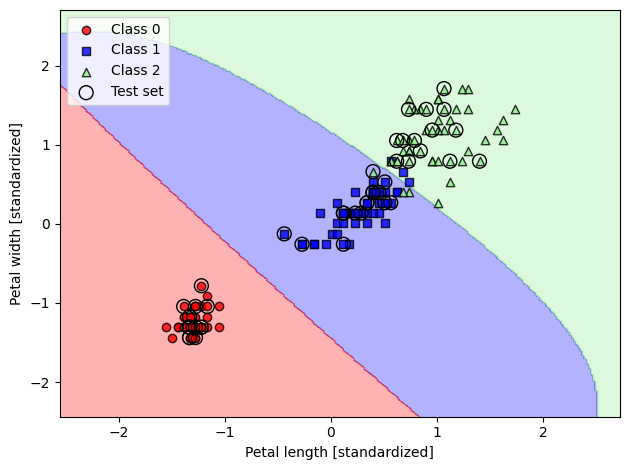

In [34]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_15.png', dpi=300)
plt.show()

In the below Figure 3.17, we can now see that the decision boundary around the classes 0 and 1 is much tighter
using a relatively large value of 𝛾 :

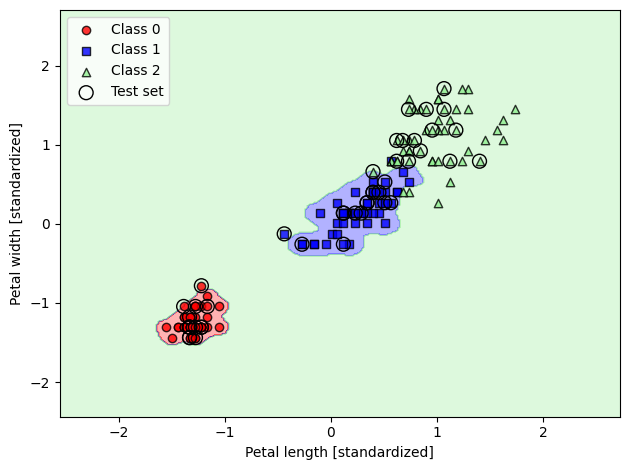

In [35]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_16.png', dpi=300)
plt.show()

Although the model fits the training dataset very well, such a classifier will likely have a high general-
ization error on unseen data. This illustrates that the 𝛾 parameter also plays an important role in con-
trolling overfitting or variance when the algorithm is too sensitive to fluctuations in the training dataset.

#### Decision tree learning


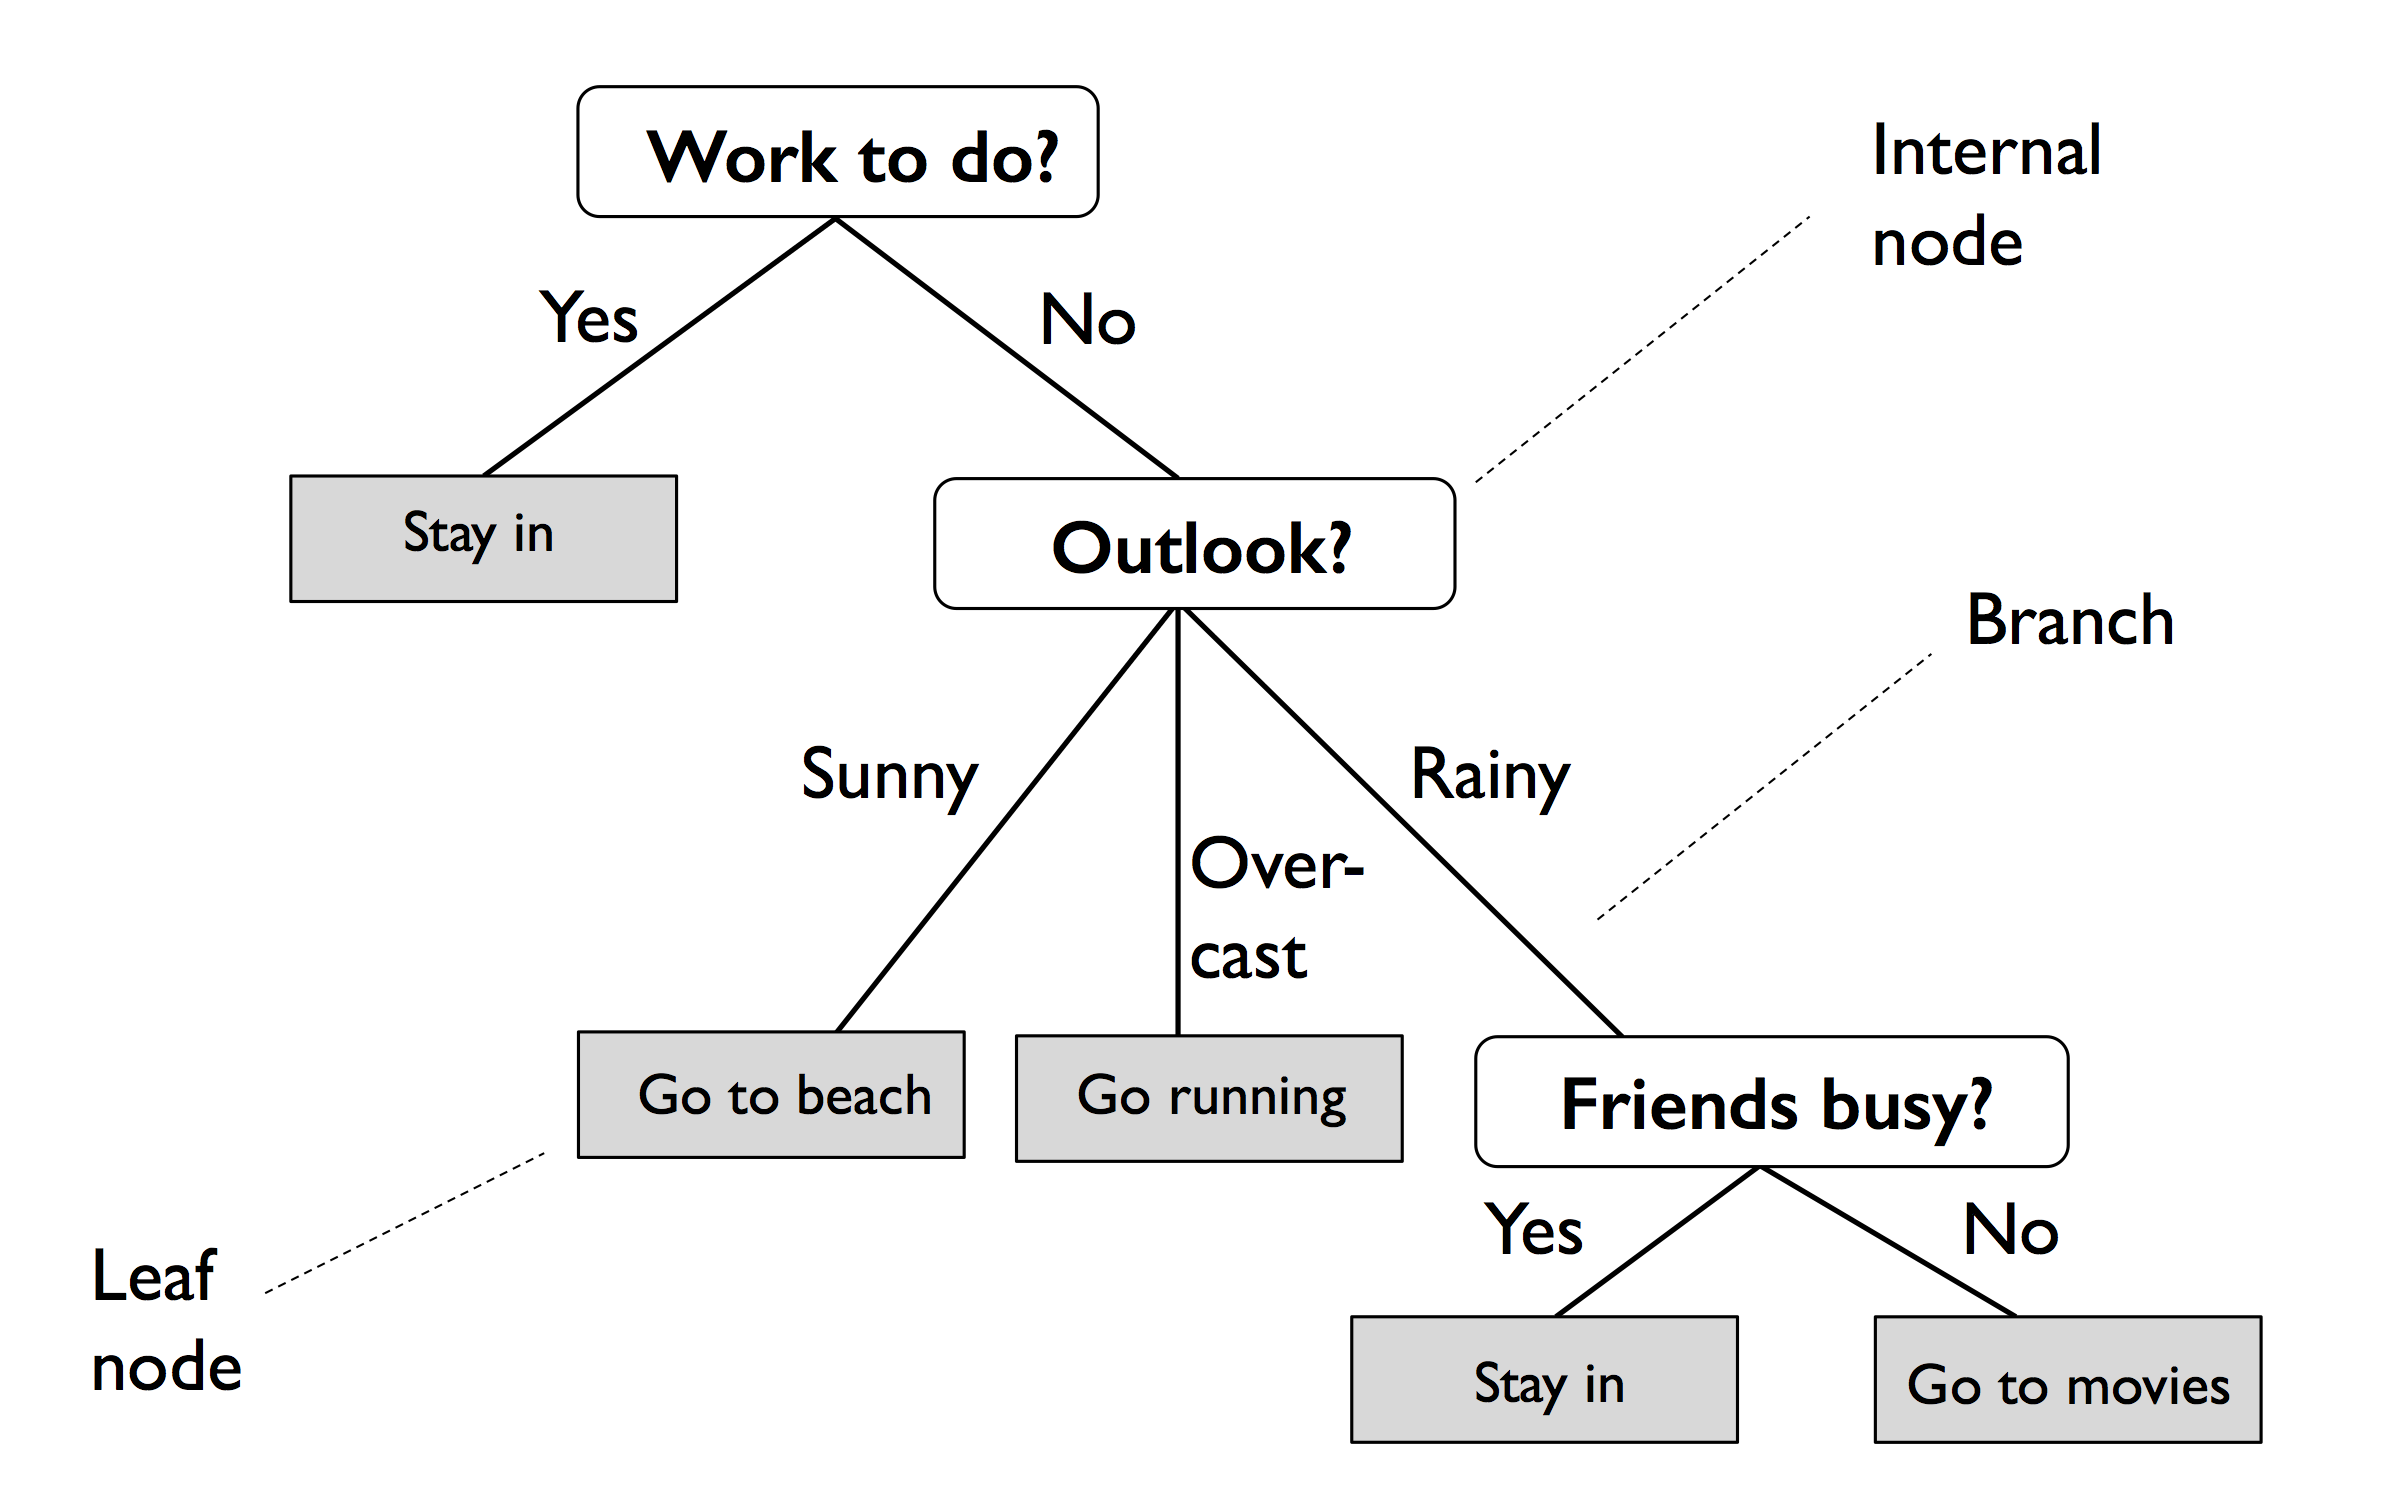

In [36]:
Image(filename='figures/03_17.png', width=500) 


Based on the features in our training dataset, the decision tree model learns a series of questions to
infer the class labels of the examples. Although Figure 3.18 illustrates the concept of a decision tree
based on categorical variables, the same concept applies if our features are real numbers, like in the
Iris dataset. For example, we could simply define a cut-off value along the sepal width feature axis
and ask a binary question: “Is the sepal width ≥ 2.8 cm?”

Using the decision algorithm, we start at the tree root and split the data on the feature that results in
the largest information gain (IG), which will be explained in more detail in the following section. In
an iterative process, we can then repeat this splitting procedure at each child node until the leaves are
pure. This means that the training examples at each node all belong to the same class. In practice, this
can result in a very deep tree with many nodes, which can easily lead to overfitting. Thus, we typically
want to prune the tree by setting a limit for the maximum depth of the tree.

![Screenshot from 2023-06-29 20-56-24.png](<attachment:Screenshot from 2023-06-29 20-56-24.png>)
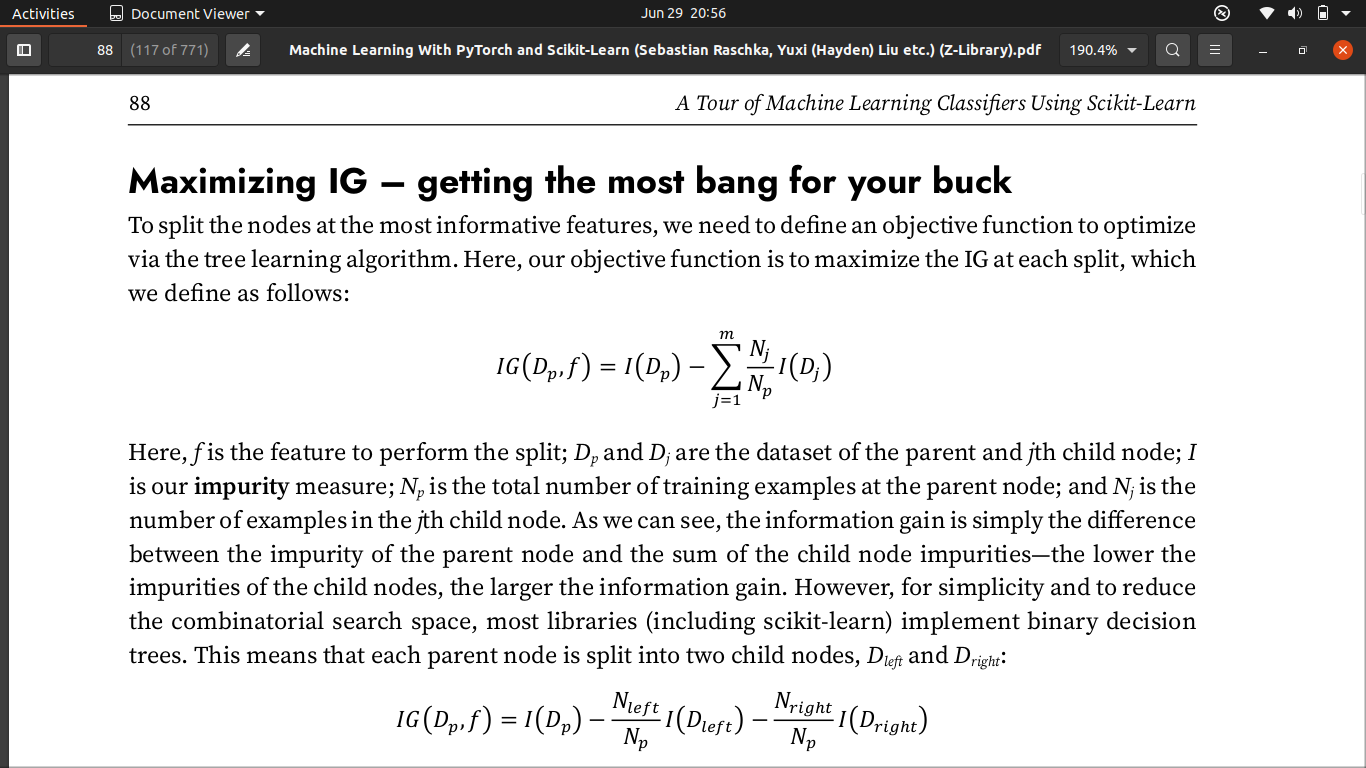

![Screenshot from 2023-06-29 20-56-28.png](<attachment:Screenshot from 2023-06-29 20-56-28.png>)
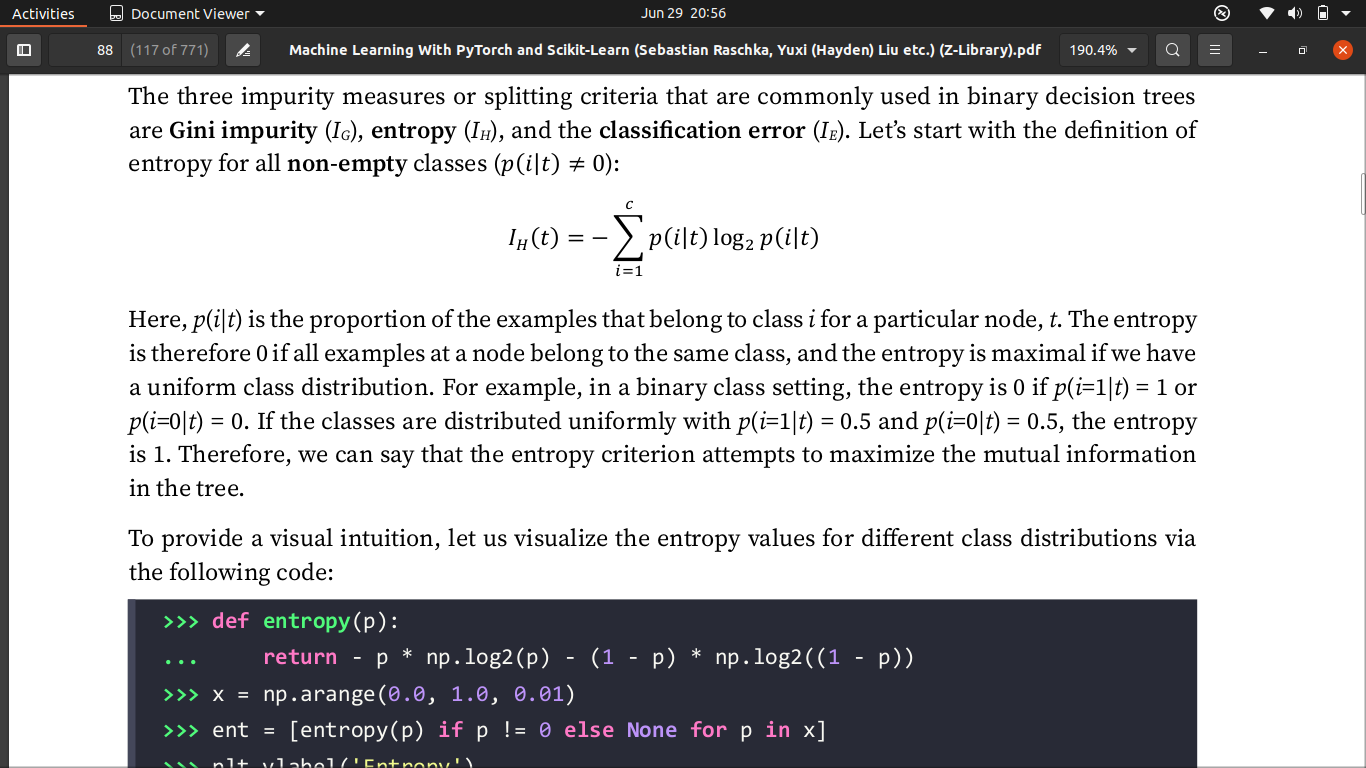

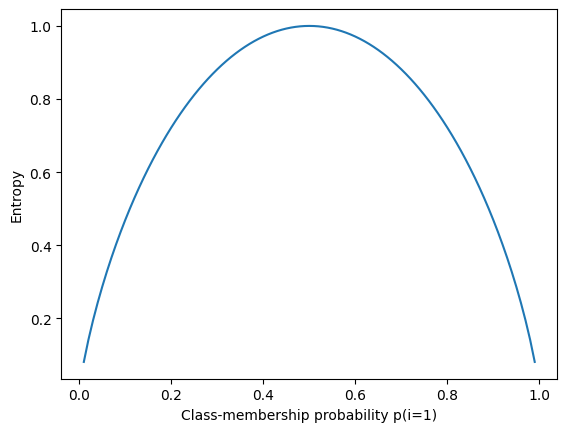

In [37]:
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None 
       for p in x]

plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
#plt.savefig('figures/03_26.png', dpi=300)
plt.show()

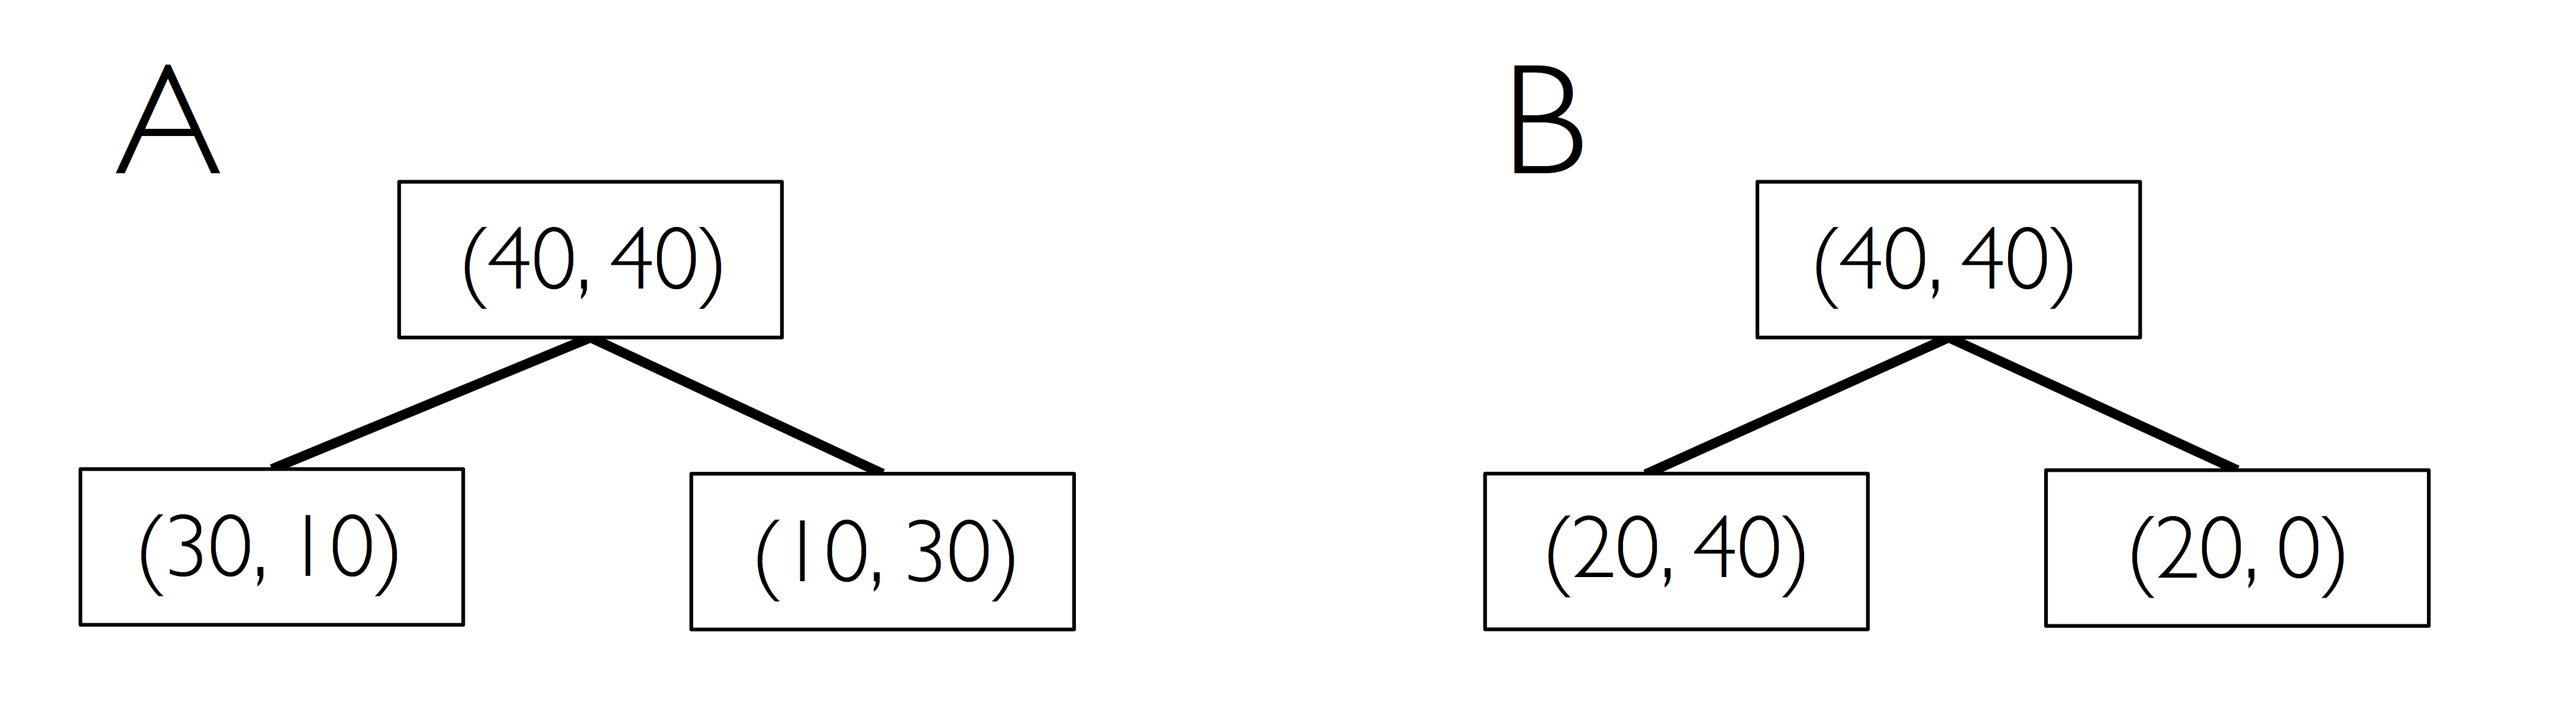

In [38]:
Image(filename='figures/03_18.png', width=500) 


#### Maximizing information gain - getting the most bang for the buck


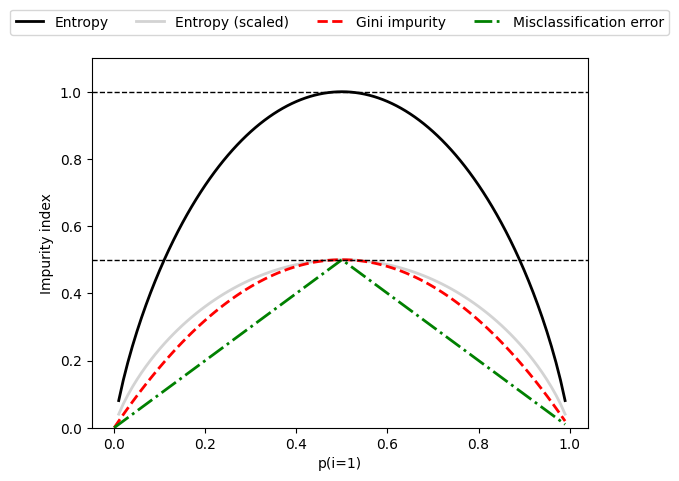

In [39]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity index')
#plt.savefig('figures/03_19.png', dpi=300, bbox_inches='tight')
plt.show()

#### **Building a decision tree**


Decision trees can build complex decision boundaries by dividing the feature space into rectangles.
However, we have to be careful since the deeper the decision tree, the more complex the decision
boundary becomes, which can easily result in overfitting. Using scikit-learn, we will now train a de-
cision tree with a maximum depth of 4, using the Gini impurity as a criterion for impurity:

Although feature scaling may be desired for visualization purposes, note that feature scaling is not a
requirement for decision tree algorithms. The code is as follows:

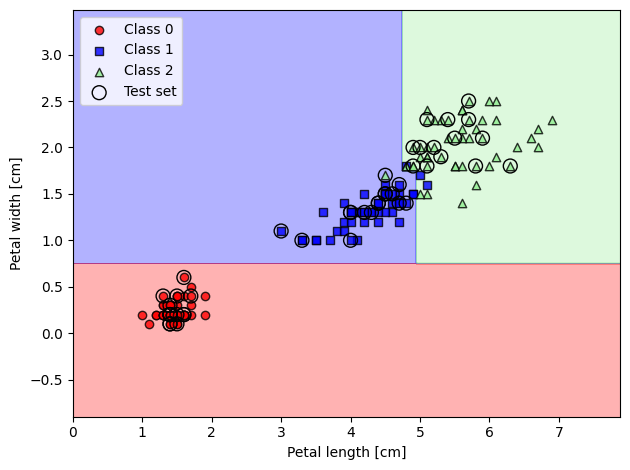

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_20.png', dpi=300)
plt.show()

After executing the code example, we get the typical axis-parallel decision boundaries of the decision
tree:

A nice feature in scikit-learn is that it allows us to readily visualize the decision tree model after train-
ing via the following code:

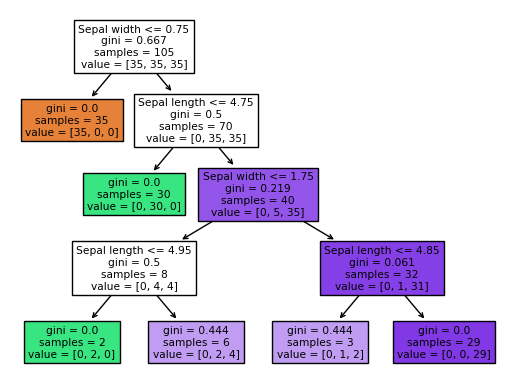

In [41]:
from sklearn import tree

feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']
tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)

#plt.savefig('figures/03_21_1.pdf')
plt.show()

Looking at the decision tree figure, we can now nicely trace back the splits that the decision tree de-
termined from our training dataset. Regarding the feature splitting criterion at each node, note that
the branches to the left correspond to “True” and branches to the right correspond to “False.”

Looking at the root node, it starts with 105 examples at the top. The first split uses a sepal width cut-
off ≤ 0.75 cm for splitting the root node into two child nodes with 35 examples (left child node) and
70 examples (right child node). After the first split, we can see that the left child node is already pure
and only contains examples from the Iris-setosa class (Gini impurity = 0). The further splits on the
right are then used to separate the examples from the Iris-versicolor and Iris-virginica class.

Looking at this tree, and the decision region plot of the tree, we can see that the decision tree does a
very good job of separating the flower classes. Unfortunately, scikit-learn currently does not implement
functionality to manually post-prune a decision tree. However, we could go back to our previous code
example, change the max_depth of our decision tree to 3 , and compare it to our current model, but
we leave this as an exercise for the interested reader.

Alternatively, scikit-learn provides an automatic cost complexity post-pruning procedure for decision
trees. Interested readers can find more information about this more advanced topic in the following
tutorial: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.
html.

#### **Combining multiple decision trees via random forests**


![Screenshot from 2023-06-29 21-05-30.png](<attachment:Screenshot from 2023-06-29 21-05-30.png>)
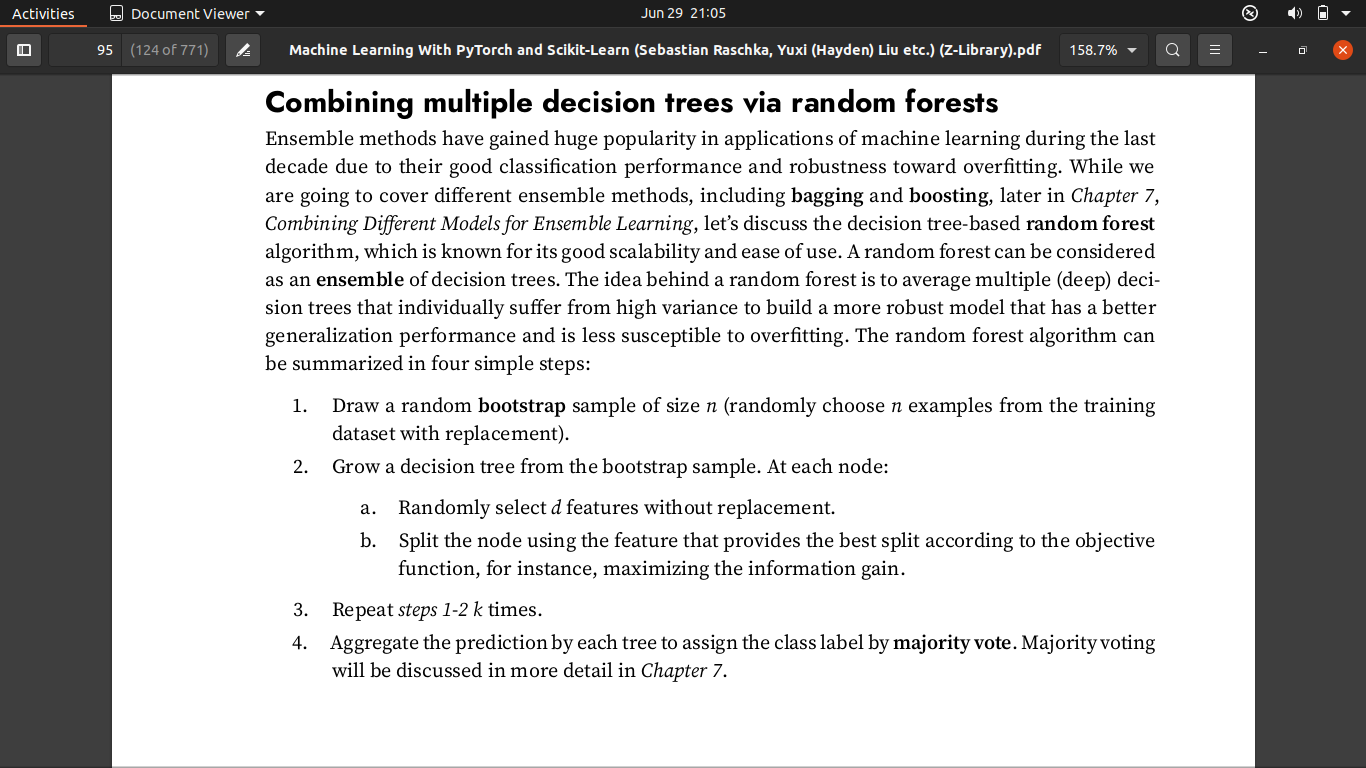

We should note one slight modification in step 2 when we are training the individual decision trees:
instead of evaluating all features to determine the best split at each node, we only consider a random
subset of those.

Although random forests don’t offer the same level of interpretability as decision trees, a big advantage
of random forests is that we don’t have to worry so much about choosing good hyperparameter values.
We typically don’t need to prune the random forest since the ensemble model is quite robust to noise
from averaging the predictions among the individual decision trees. The only parameter that we
need to care about in practice is the number of trees, k, (step 3) that we choose for the random forest.
Typically, the larger the number of trees, the better the performance of the random forest classifier
at the expense of an increased computational cost.

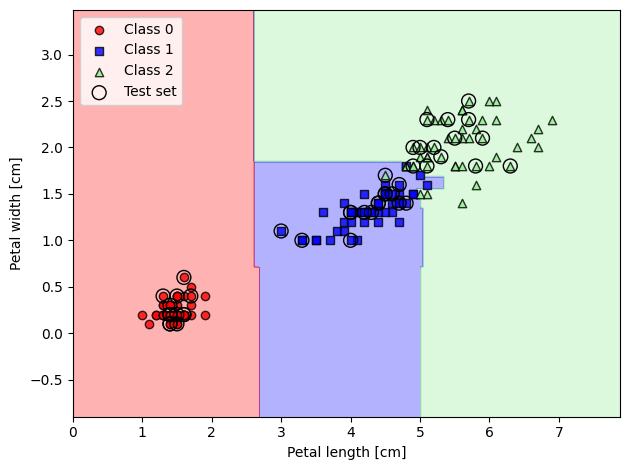

In [42]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_2.png', dpi=300)
plt.show()

Using the preceding code, we trained a random forest from 25 decision trees via the n_estimators
parameter. By default, it uses the Gini impurity measure as a criterion to split the nodes. Although
we are growing a very small random forest from a very small training dataset, we used the n_jobs pa-
rameter for demonstration purposes, which allows us to parallelize the model training using multiple
cores of our computer (here, two cores). If you encounter errors with this code, your computer may
not support multiprocessing. You can omit the n_jobs parameter or set it to n_jobs=None .

#### K-nearest neighbors - a lazy learning algorithm


The last supervised learning algorithm that we want to discuss in this chapter is the k-nearest neigh-
bor (KNN) classifier, which is particularly interesting because it is fundamentally different from the
learning algorithms that we have discussed so far.

KNN is a typical example of a lazy learner. It is called “lazy” not because of its apparent simplicity, but
because it doesn’t learn a discriminative function from the training data but memorizes the training
dataset instead.

The KNN algorithm itself is fairly straightforward and can be summarized by the following steps:
1. Choose the number of k and a distance metric
2. Find the k-nearest neighbors of the data record that we want to classify
3. Assign the class label by majority vote
Figure 3.25 illustrates how a new data point (?) is assigned the triangle class label based on majority
voting among its five nearest neighbors:

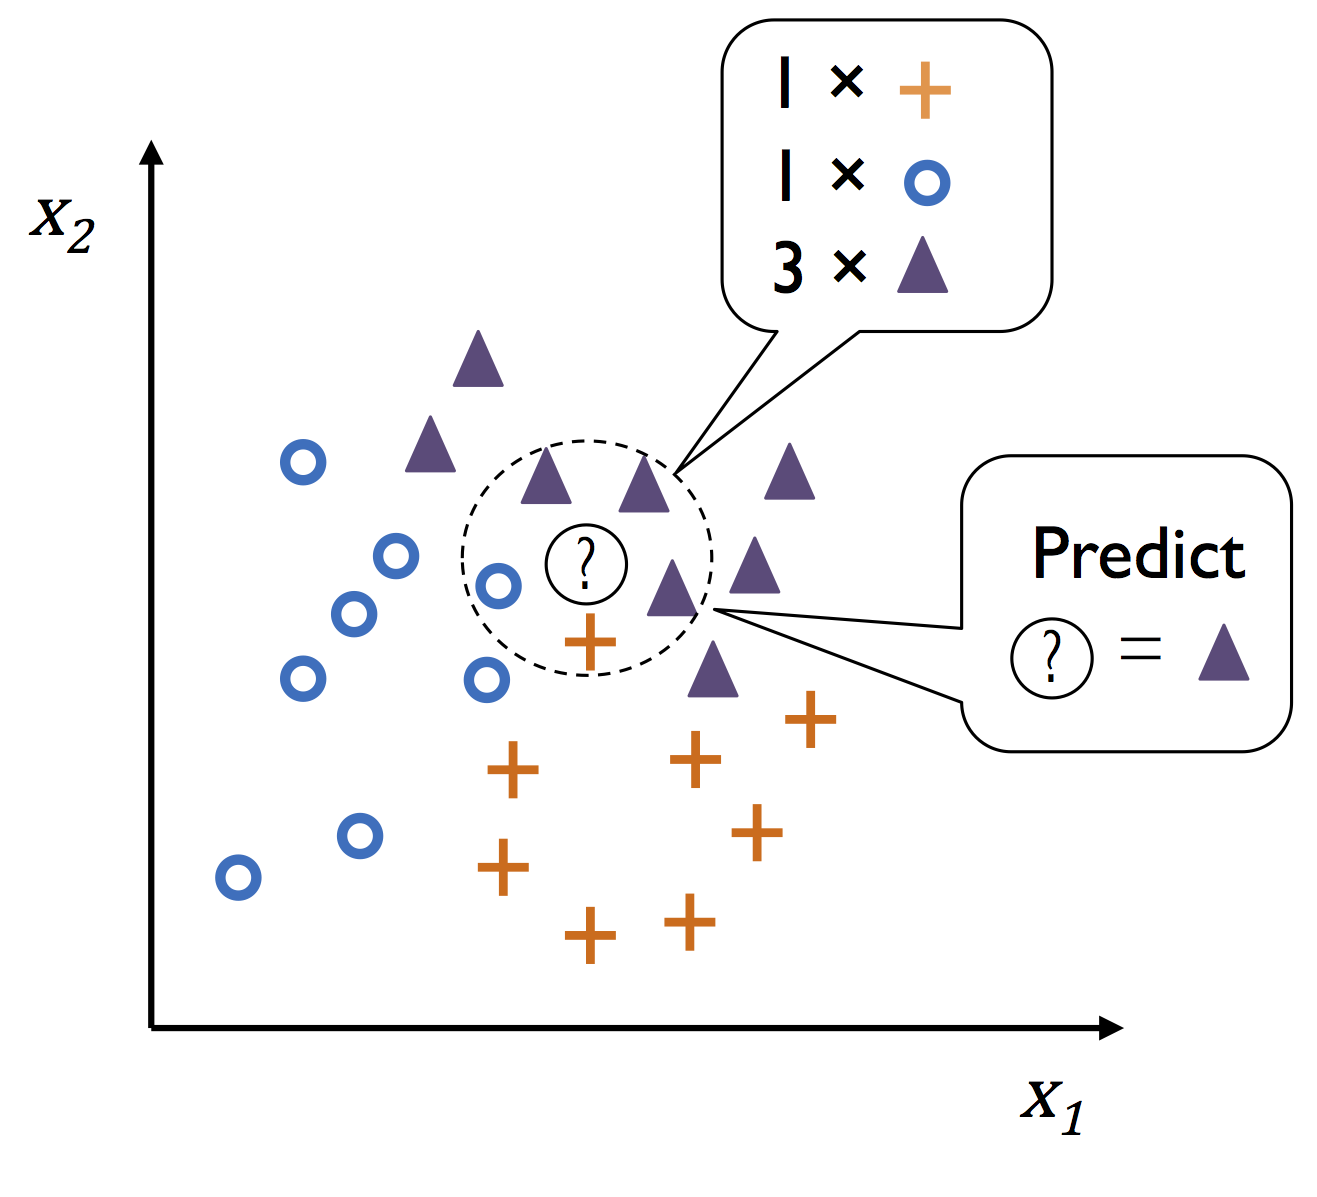

In [43]:
Image(filename='figures/03_23.png', width=400) 


Based on the chosen distance metric, the KNN algorithm finds the k examples in the training dataset
that are closest (most similar) to the point that we want to classify. The class label of the data point is
then determined by a majority vote among its k nearest neighbors.

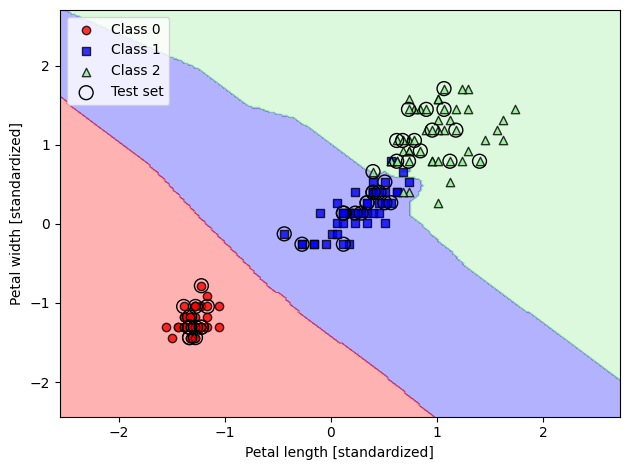

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_24_figures.png', dpi=300)
plt.show()

#### Summary

In [49]:
# !pip install -q nbconvert
# !jupyter nbconvert --to script  chapter_3.ipynb --output ch03

[NbConvertApp] Converting notebook chapter_3.ipynb to script
[NbConvertApp] Writing 16668 bytes to ch03.py.py
